<font color='LIGHT BLUE'> 
This EDA identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.</font>

### Importing Libraries

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn : advanced visualization
import seaborn as sns

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', None) # to display all the columns
pd.set_option('display.max_rows', None)    # to display all the rows


In [2]:
# Filtering out the warnings
import warnings

# if there are any warning due to version mismatch, it will be ignored
warnings.filterwarnings('ignore') 

### Data Sourcing

- Reading the **`application_data.csv`** data file provided and store it in a dataframe **`application`**.
- Reading the **`previous_application.csv`** data file provided and store it in a dataframe **`pre_application`**.

In [3]:
# Reading the csv file using 'read_csv' from dataset location.

import os

# Dataset location

os.chdir('C:\\Users\\Manomeet Roy\\Desktop\\Up_Grad_files\\Data Toolkit\\Group-Case-Study-1-(Credit EDA Case Study)\\Dataset_Case_Study')

# Read the csv file

application = pd.read_csv("application_data.csv", encoding = "utf-8")
pre_application = pd.read_csv("previous_application.csv", encoding = "utf-8")

### Inspecting the dataframe 


In [4]:
application.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0000,-2120,nan,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.0000,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.0000,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0000,-291,nan,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,nan,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.0800,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0000,-2531,26.0000,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.5559,0.

In [5]:
pre_application.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,SATURDAY,15,Y,1,0.0000,0.1828,0.8673,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0000,middle,POS mobile with interest,365243.0000,-42.0000,300.0000,-42.0000,-37.0000,0.0000
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,nan,607500.0000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0000,low_action,Cash X-Sell: low,365243.0000,-134.0000,916.0000,365243.0000,365243.0000,1.0000
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,nan,112500.0000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,high,Cash X-Sell: high,365243.0000,-271.0000,59.0000,365243.0000,365243.0000,1.0000


In [6]:
# Checking the number of rows and columns in both the dataframe

print('application_data has:',application.shape[0],'Rows and',application.shape[1], 'Columns')
print('previous_application has:',pre_application.shape[0],'Rows and',pre_application.shape[1], 'Columns')

application_data has: 307511 Rows and 122 Columns
previous_application has: 1670214 Rows and 37 Columns


In [7]:
# Check the column-wise info and data type of application_data dataframe

application.info(max_cols = 200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [8]:
# Check the column-wise info and data type of previous_application dataframe

pre_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [9]:
# Checking the summary for the numeric columns in application_data 

application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307499.0000,307233.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,104582.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307509.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,134133.0000,306851.0000,246546.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,159080.0000,306490.0000,306490.0000,306490.0000,306490.0000,307510.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
mean,278180.5186,0.0807,0.4171,168797.9193,599025.9997,27108.5739,538396.2074,0.0209,-16036.9951,63815.0459,-4986.1203,-2994.2024,12.0611,1.0000,0.8199,0.1994,0.9981,0.2811,0.0567,2.1527,2.0525,2.0315,12.0634,0.0151,0.0508,0.0407,0.0782,0.2305,0.1796,0.5021,0.5144,0.5109,0.1174,0.0884,0.9777,0.7525,0.0446,0.0789,0.1497,0.2263,0.2319,0.0663,0.1008,0.1074,0.0088,0.0284,0.1142,0.0875,0.9771,0.7596,0.0426,0.0745,0.1452,0.2223,0.2281,0.0650,0.1056,0.1060,0.0081,0.0270,0.1178,0.0880,0.9778,0.7557,0.0446,0.0781,0.1492,0.2259,0.2316,0.0672,0.1020,0.1086,0.0087,0.0282,0.1025,1.4222,0.1434,1.4053,0.1000,-962.8588,0.0000,0.7100,0.0001,0.0151,0.0881,0.0002,0.0814,0.0039,0.0000,0.0039,0.0000,0.0035,0.0029,0.0012,0.0099,0.0003,0.0081,0.0006,0.0005,0.0003,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
std,102790.1753,0.2724,

In [10]:
# Checking the summary for the numeric columns in previous_application 

pre_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.0000,1670214.0000,1297979.0000,1670214.0000,1670213.0000,774370.0000,1284699.0000,1670214.0000,1670214.0000,774370.0000,5951.0000,5951.0000,1670214.0000,1670214.0000,1297984.0000,997149.0000,997149.0000,997149.0000,997149.0000,997149.0000,997149.0000
mean,1923089.1353,278357.1741,15955.1207,175233.8604,196114.0212,6697.4021,227847.2793,12.4842,0.9965,0.0796,0.1884,0.7735,-880.6797,313.9511,16.0541,342209.8550,13826.2693,33767.7741,76582.4031,81992.3438,0.3326
std,532597.9587,102814.8238,14782.1373,292779.7624,318574.6165,20921.4954,315396.5579,3.3340,0.0593,0.1078,0.0877,0.1009,779.0997,7127.4435,14.5673,88916.1158,72444.8697,106857.0348,149647.4151,153303.5167,0.4711
min,1000001.0000,100001.0000,0.0000,0.0000,0.0000,-0.9000,0.0000,0.0000,0.0000,-0.0000,0.0348,0.3732,-2922.0000,-1.0000,0.0000,-2922.0000,-2892.0000,-2801.0000,-2889.0000,-2874.0000,0.0000
25%,1461857.2500,189329.0000,6321.7800,18720.0000,24160.5000,0.0000,50841.0000,10.0000,1.0000,0.0000,0.1607,0.7156,-1300.0000,-1.0000,6.0000,365243.0000,-1628.0000,-1242.0000,-1314.0000,-1270.0000,0.0000
50%,1923110.5000,278714.5000,11250.0000,71046.0000,80541.0000,1638.0000,112320.0000,12.0000,1.0000,0.0516,0.1891,0.8351,-581.0000,3.0000,12.0000,365243.0000,-831.0000,-361.0000,-537.0000,-499.0000,0.0000
75%,2384279.7500,367514.0000,20658.4200,180360.0000,216418.5000,7740.0000,234000.0000,15.0000,1.0000,0.1089,0.1933,0.8525,-280.0000,82.0000,24.0000,365243.0000,-411.0000,129.0000,-74.0000,-44.0000,1.0000
max,2845382.0000,456255.0000,418058.1450,6905160.0000,6905160.0000,3060045.0000,6905160.0000,23.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,4000000.0000,84.0000,365243.0000,365243.0000,365243.0000,365243.0000,365243.0000,1.0000


### Data Cleaning and Manipulation to `application_data`

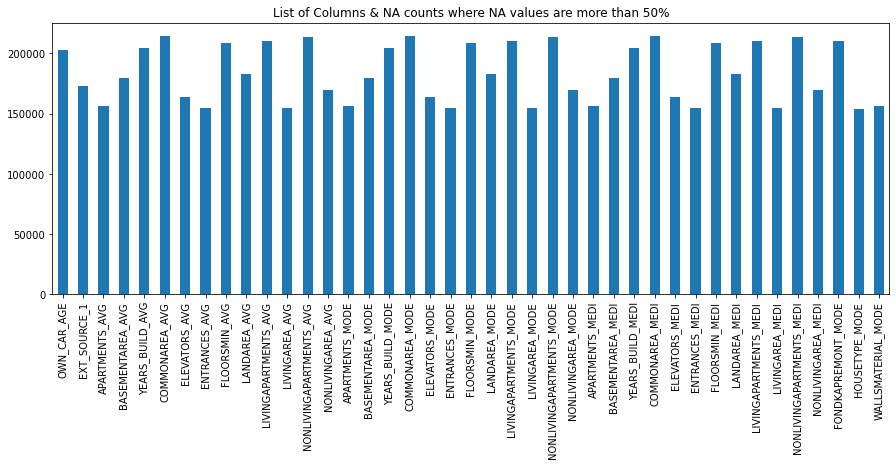

Count of NA columns is : 41


In [11]:
# List of Columns & NA counts where NA values are more than 50%

NA_col = application.isnull().sum()
NA_col = NA_col[NA_col.values >=(0.5*len(application))]
plt.figure(figsize=(15,5))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()
print('Count of NA columns is :', len(NA_col))

<font color='blue'><b>Insights</b>: So we can see from the above plot that there are 41 columns in the dataset where NA values are more then 50%.</font> 


As we can see there are 307511 Rows and 122 Columns in the dataset, it will be very difficult to look at each column one by one & find the NA or missing values. So we find out all columns where missing values are more than certain percentage, let's say 50%. We will remove those columns as it is not feasable to impute missing values for those columns.

#### removeNulls function will drop the columns whose null Count is more than 50%

In [12]:
def removeNulls(dataframe, axis =1, percent=0.5):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis =1 defines drop columns    
    * percent   : percent of data where columns values are null,default is 0.5(50%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 1:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [13]:
# Droping the null columns

application = removeNulls(application, axis =1,percent = 0.5)

Number of Columns dropped	:  41

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 81)


In [14]:
# List of Columns & NA counts where NA values are around 13% or less

NA_col = application.isnull().sum()
NA_col1 = NA_col[NA_col.values <=(0.13*len(application))]
NA_col2 = NA_col1[NA_col1.values >0]
print(NA_col2)
print('\nCount of NA columns is :', len(NA_col2))

AMT_ANNUITY                   12
AMT_GOODS_PRICE              278
NAME_TYPE_SUITE             1292
CNT_FAM_MEMBERS                2
EXT_SOURCE_2                 660
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
DAYS_LAST_PHONE_CHANGE         1
dtype: int64

Count of NA columns is : 10


*There are 10 columns in the dataset where NA values are 13% or less. We are selecting only 5 five columns because its a important in terms of business perspective. we perform impute process to hendal the missing values.*

`12- AMT_ANNUITY`

`278 - AMT_GOODS_PRICE`

`1292 - NAME_TYPE_SUITE`

`2 - CNT_FAM_MEMBERS`

`660 - EXT_SOURCE_2`


In [15]:
df =application[['AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','CNT_FAM_MEMBERS','EXT_SOURCE_2']]

In [16]:
df.head()

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_FAM_MEMBERS,EXT_SOURCE_2
0,24700.5000,351000.0000,Unaccompanied,1.0000,0.2629
1,35698.5000,1129500.0000,Family,2.0000,0.6222
2,6750.0000,135000.0000,Unaccompanied,1.0000,0.5559
3,29686.5000,297000.0000,Unaccompanied,2.0000,0.6504
4,21865.5000,513000.0000,Unaccompanied,1.0000,0.3227


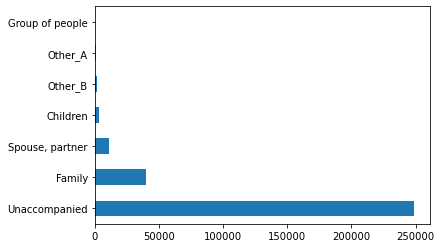

In [17]:
# missing values in categorical variable

application.NAME_TYPE_SUITE.value_counts().plot(kind ='barh')
plt.show()

<font color='blue'><b>Insights</b>: `Unaccompanied` is a most frequent value in `NAME_TYPE_SUITE` we can replace the missing value with `Unaccompanied`.</font> 

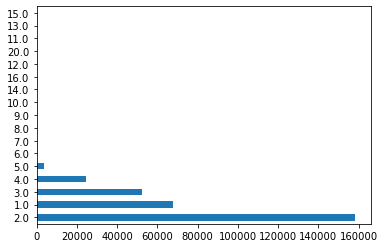

In [18]:
# missing values in continuous variable

application.CNT_FAM_MEMBERS.value_counts().plot(kind ='barh')
plt.show()

<font color='blue'><b>Insights</b>: `Count of family member 2` is a most frequent value in `CNT_FAM_MEMBERS` we can replace the missing values with `2` or we can delete the this 2 missing row because its only 2 rows out of 307511 rows it will not effect the analysis.</font> 

In [19]:
# missing values in continuous variable

application.AMT_ANNUITY.describe()

count   307499.0000
mean     27108.5739
std      14493.7373
min       1615.5000
25%      16524.0000
50%      24903.0000
75%      34596.0000
max     258025.5000
Name: AMT_ANNUITY, dtype: float64

In [20]:
# missing values in continuous variable

application.AMT_ANNUITY.mode()

0   9000.0000
dtype: float64

<font color='blue'><b>Insights</b>: `AMT_ANNUITY` has maximum amount is 258025 which effect the mean value so we can use a amount that appears most frequently in a data set to replace the missing values. </font> 

In [21]:
# missing values in continuous variable

application.AMT_GOODS_PRICE.describe()

count    307233.0000
mean     538396.2074
std      369446.4605
min       40500.0000
25%      238500.0000
50%      450000.0000
75%      679500.0000
max     4050000.0000
Name: AMT_GOODS_PRICE, dtype: float64

<font color='blue'><b>Insights</b>: `AMT_GOODS_PRICE` has a maximum amount is 4050000 and minimum amount is 40500 hance it is goods price which leads the loan ammount we can replace the missing values with the average amount.</font> 

In [22]:
# EXT_SOURCE_2 is the Normalized score from external data source
# missing values in continuous variable

application.EXT_SOURCE_2.describe()

count   306851.0000
mean         0.5144
std          0.1911
min          0.0000
25%          0.3925
50%          0.5660
75%          0.6636
max          0.8550
Name: EXT_SOURCE_2, dtype: float64

In [23]:
application.EXT_SOURCE_2.mode()

0   0.2859
dtype: float64

<font color='blue'><b>Insights</b>: `EXT_SOURCE_2` has maximum normalized score is 0.8550 which effect the mean value so we can use a normalized score that appears most frequently in a data set to replace the missing values. </font> 

In [24]:
# checking the data type of the each columns in dataframe

application.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


### Data type casting and value modification to some important columns which is important for business perspective and analysis.
- TARGET :  Datatype casting int to object
- CNT_FAM_MEMBERS : Datatype casting float to int
- DAYS_BIRTH : Negetive BIRTH_DAYS to BIRTH_YEARS
- DAYS_EMPLOYED : Negetive DAYS_EMPLOYED to EMPLOYED_YEARS

In [25]:
# Now we will convert 'int64' into 'object' type

application.TARGET = application.TARGET.astype('str')

print('New Datatype for TARGET is :  ',application.TARGET.dtype)

New Datatype for TARGET is :   object


In [26]:
# Convert a 'DAYS_BIRTH' and DAYS_EMPLOYED into year and Rename the 'DAYS_BIRTH' into 'BIRTH_YEARS' and 'DAYS_EMPLOYED' into 'EMPLOYED_YEARS'

application.loc[:,'DAYS_BIRTH':'DAYS_EMPLOYED'] = application.loc[:,'DAYS_BIRTH':'DAYS_EMPLOYED'].apply(lambda x: (abs(x/365)).astype(int))
application.rename(columns = {'DAYS_BIRTH':'BIRTH_YEARS', 'DAYS_EMPLOYED':'EMPLOYED_YEARS'}, inplace = True)

In [27]:
application[['BIRTH_YEARS','EMPLOYED_YEARS' ]].head(3)

,BIRTH_YEARS,EMPLOYED_YEARS
0,25,1
1,45,3
2,52,0


#### Checking a outliers for a 5 numerical variables
1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY
4. AMT_GOODS_PRICE
5. EMPLOYED_YEARS

In [28]:
# describing the Annual income variable of application.

application.AMT_INCOME_TOTAL.describe()

count      307511.0000
mean       168797.9193
std        237123.1463
min         25650.0000
25%        112500.0000
50%        147150.0000
75%        202500.0000
max     117000000.0000
Name: AMT_INCOME_TOTAL, dtype: float64

*Max value is 11,70,00 000 which is very high from the mean value, so we will remove the outliers from Annual Income.*

In [29]:
# Removing the Outliers (values from 99 to 100%)

q = application["AMT_INCOME_TOTAL"].quantile(0.995)
application = application[application["AMT_INCOME_TOTAL"] < q]
application["AMT_INCOME_TOTAL"].describe()

count   305943.0000
mean    164764.1491
std      81644.2477
min      25650.0000
25%     112500.0000
50%     144000.0000
75%     202500.0000
max     625500.0000
Name: AMT_INCOME_TOTAL, dtype: float64

In [30]:
# describing the Loan amount variable of application.

application.AMT_CREDIT.describe()

count    305943.0000
mean     596224.3481
std      399207.2410
min       45000.0000
25%      270000.0000
50%      512064.0000
75%      808650.0000
max     4050000.0000
Name: AMT_CREDIT, dtype: float64

**Max value is 40500000 which is very high from the mean value, so we will remove the outliers from AMT_CREDIT.**

In [31]:
# Removing the Outliers (values from 99 to 100%)

q = application["AMT_CREDIT"].quantile(0.995)
application = application[application["AMT_CREDIT"] < q]
application["AMT_CREDIT"].describe()

count    304098.0000
mean     586277.3729
std      378899.6526
min       45000.0000
25%      270000.0000
50%      508495.5000
75%      808650.0000
max     2012139.0000
Name: AMT_CREDIT, dtype: float64

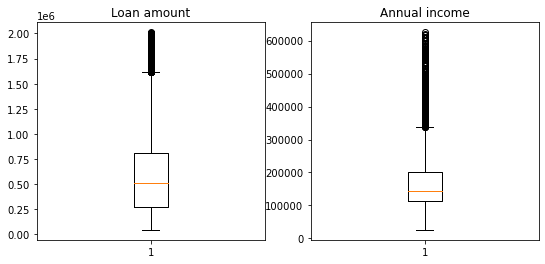

In [32]:
# Ploting a boxplot loan amount and Annual income after removing the Outliers

plt.figure(figsize =(9,4)) 
plt.subplot(1,2,1)
plt.boxplot(application.AMT_CREDIT)
plt.title('Loan amount')

plt.subplot(1,2,2)
plt.boxplot(application.AMT_INCOME_TOTAL)
plt.title('Annual income')

# show plot 
plt.show() 

In [33]:
# describing the EMPLOYED_YEAR variable of application.

application.EMPLOYED_YEARS.describe()

count   304098.0000
mean       186.0132
std        382.8090
min          0.0000
25%          2.0000
50%          6.0000
75%         15.0000
max       1000.0000
Name: EMPLOYED_YEARS, dtype: float64

**Max value is 1000 which is very high value and working years can not be a 1000 year, so we will remove the outliers from EMPLOYED_YEARS.**

count   249032.0000
mean         6.0243
std          6.4093
min          0.0000
25%          2.0000
50%          4.0000
75%          8.0000
max         49.0000
Name: EMPLOYED_YEARS, dtype: float64


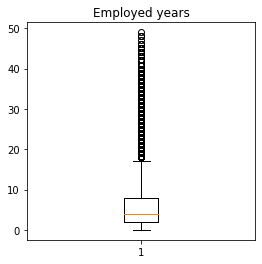

In [34]:
# Removing the Outliers (values from 99 to 100%) and Ploting a boxplot

q = application["EMPLOYED_YEARS"].quantile(0.995)
application = application[application["EMPLOYED_YEARS"] < q]
print(application["EMPLOYED_YEARS"].describe())

plt.figure(figsize =(9,4))
plt.subplot(1,2,2)
plt.boxplot(application.EMPLOYED_YEARS)
plt.title('Employed years')

# show plot 
plt.show()

In [35]:
# describing the annuity(EMI) and Goods price amount variable of application.

print(application.AMT_ANNUITY.describe())

print('\n',application.AMT_GOODS_PRICE.describe())


count   249020.0000
mean     27407.0325
std      13958.2981
min       1980.0000
25%      16956.0000
50%      25562.2500
75%      35172.0000
max     180000.0000
Name: AMT_ANNUITY, dtype: float64

 count    248777.0000
mean     536511.4147
std      349359.8238
min       40500.0000
25%      247500.0000
50%      450000.0000
75%      684000.0000
max     2007000.0000
Name: AMT_GOODS_PRICE, dtype: float64


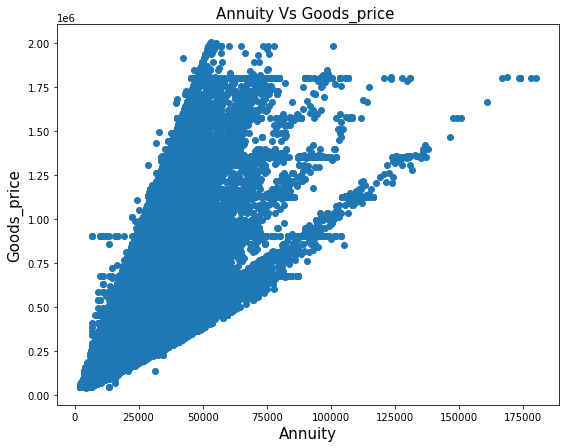

In [36]:
# Ploting a scatter plot EMI Vs Goods Price

plt.figure(figsize=[9,7])
plt.scatter(application.AMT_ANNUITY, application.AMT_GOODS_PRICE)
plt.title('Annuity Vs Goods_price ',fontsize = 15, color='black')
plt.xlabel('Annuity',fontsize = 15)
plt.ylabel('Goods_price',fontsize = 15)

plt.show()

According to the scatter graph, the density of the dot is higher between (0 to 1 lakh) and (0.15 to 1.75). It seems that there are some application with much higher(Outliers) Annuity as well as goods price.

### Derived Metrics

<font color='blue'>**We will now derive some new columns based on our business understanding that will be helpful in our analysis.** </font> 

1. Loan amount to Annual Income ratio

In [37]:
application['LOAN_INCOME_RATIO']= application['AMT_CREDIT']/application['AMT_INCOME_TOTAL']

2. Create Bins for range of Annual Income


In [38]:
bins = [0, 100000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000]
slot = ['0-1lakh', '1-5lakhs', '5-10lakhs', '10-15lakhs', '15-20lakhs','20-25lakhs', '25-30lakhs', '30-35lakhs', '35-40lakhs', '40-45lakhs', '50lakhs+']
application['ANNUAL_INC_RANGE'] = pd.cut(application['AMT_INCOME_TOTAL'], bins, labels=slot)


3. Create Bins for range of Loan Amount


In [39]:
bins = [0, 100000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000]
slot = ['0-1lakh', '1-5lakhs', '5-10lakhs', '10-15lakhs', '15-20lakhs','20-25lakhs', '25-30lakhs', '30-35lakhs', '35-40lakhs', '40lakhs+']
application['LOAN_RANGE'] = pd.cut(application['AMT_CREDIT'], bins, labels=slot)

4. Create Bins for range of Age

In [40]:
bins = (18, 25, 35, 60, 120)

slot = ['Student', 'Young', 'Adult', 'Senior']
application["AGE_CAT"] = pd.cut(application.BIRTH_YEARS, bins, labels=slot)

5. Create Bins for range of family members

In [41]:
bins = (0, 5, 9, 15, 20 )

slot = ['Small-Size', 'Medium-Size', 'Large-Size', 'Very large-Size']
application["FAMILY_SIZE_CAT"] = pd.cut(application.CNT_FAM_MEMBERS, bins, labels=slot)

### Analysis
<font color='blue'>**Checking the imbalance percentage in TARGET Variable** </font> 

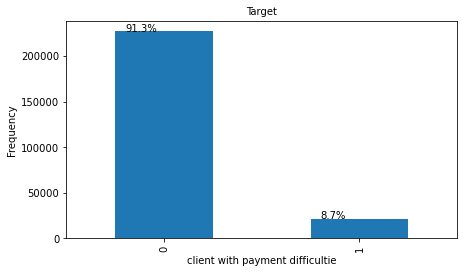

In [42]:
plt.figure(figsize=[7,4])
ax = application['TARGET'].value_counts().plot(kind = 'bar')
plt.title('Target',fontsize = 10, color='black')
plt.xlabel('client with payment difficultie',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)

for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()*100)/float(len(application))), (p.get_x()+0.05, p.get_height()+20))       
plt.show()

<font color='blue'><b>Insights</b>: Target variable is imbalanced as per the graph over 8.8% client with payment difficulties out of 100%. </font> 

#### Dividing the application dataset into two dataframe `df_0` if Target=0 and `df_1` if Target=1

In [43]:
df_0 = application[application['TARGET']=='0']
df_1 = application[application['TARGET']=='1']

### Univariate and Bivariate Analysis

**Continuous Variables**

In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot, Violin Plot etc.

**Categorical Variables**

For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

##### Univariate analysis function will plot the graphs based on the parameter values.

In [44]:
def univariate_analysis(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical Bivariate analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        if hue==None:
            plt.figure(figsize=[20,9])
            ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        else:
            plt.figure(figsize=[20,9])
            ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
            plt.legend(loc='upper right')
    
    plt.show()

### Univariate Analysis with Continuous and Categorical Variables

#### Annual Income

df_0: Target-0



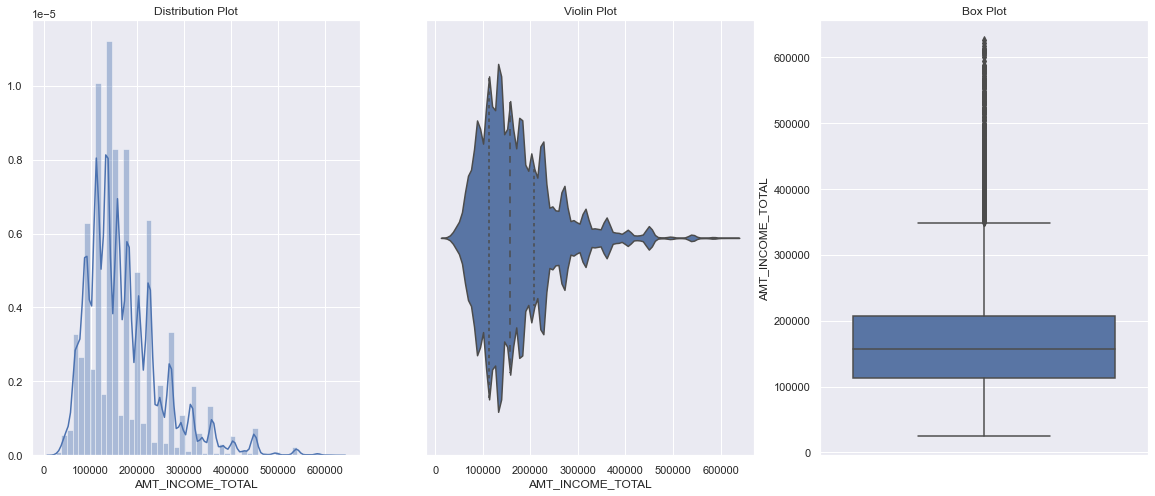


df_1: Target-1


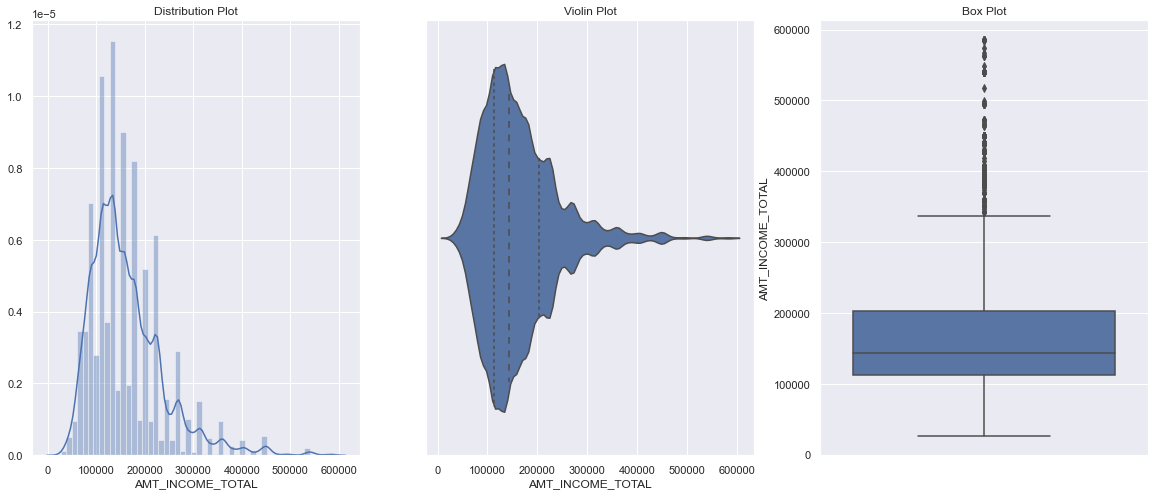

In [45]:
# Performing a univarite analysis to 'AMT_INCOME_TOTAL' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='AMT_INCOME_TOTAL',vartype=0)

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='AMT_INCOME_TOTAL',vartype=0)

<font color='blue'><b>Insights</b>:In both the cases most of the client earns beteen 100000 to 200000 ₹ annually.</font> 

df_0: Target-0



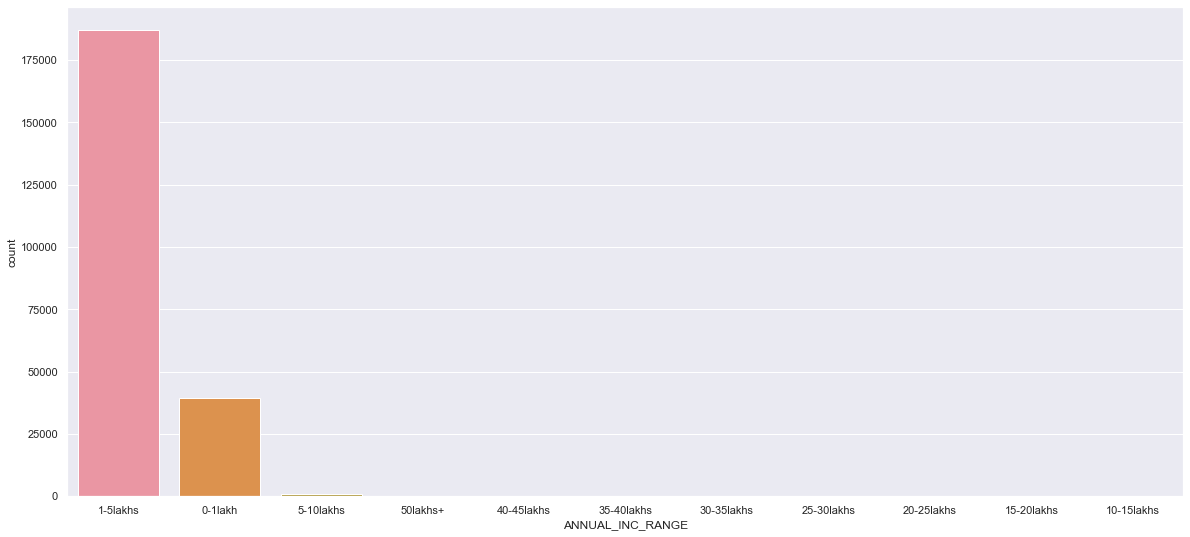


df_1: Target-1


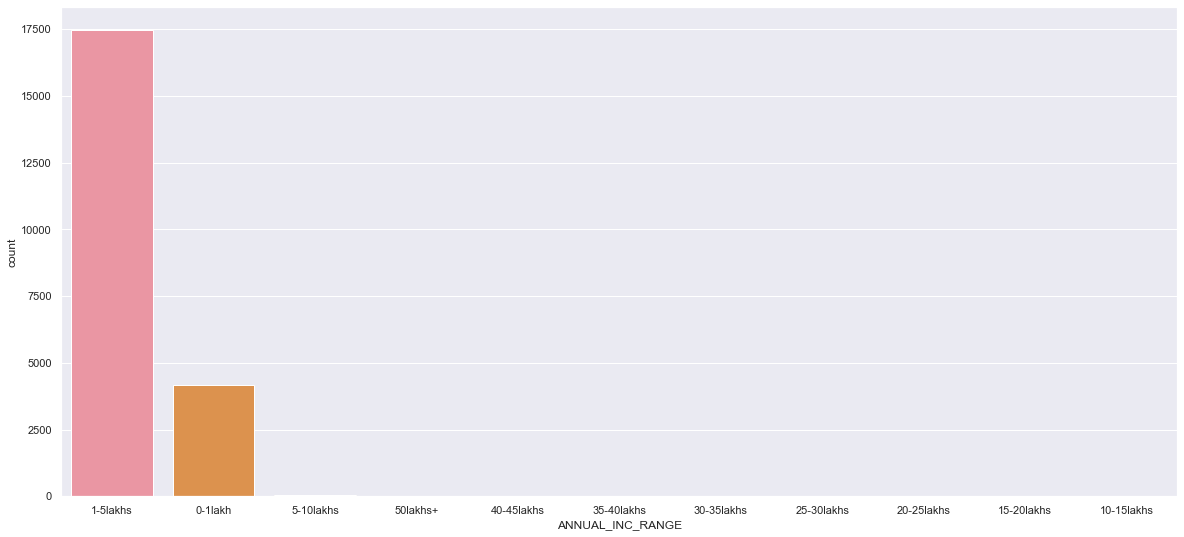

In [46]:
# Performing a univarite analysis to 'ANNUAL_INC_RANGE' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='ANNUAL_INC_RANGE',vartype=1)

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='ANNUAL_INC_RANGE',vartype=1)

<font color='blue'><b>Insights</b>: In both the cases more income frequent range is 1 to 5 lakhs ₹. In case of Target-1 the the most of the client annual income is 1-5 lakhs ₹ although these customers are finding the difficulties of payment. .</font> 

#### Loan Amount

df_0: Target-0



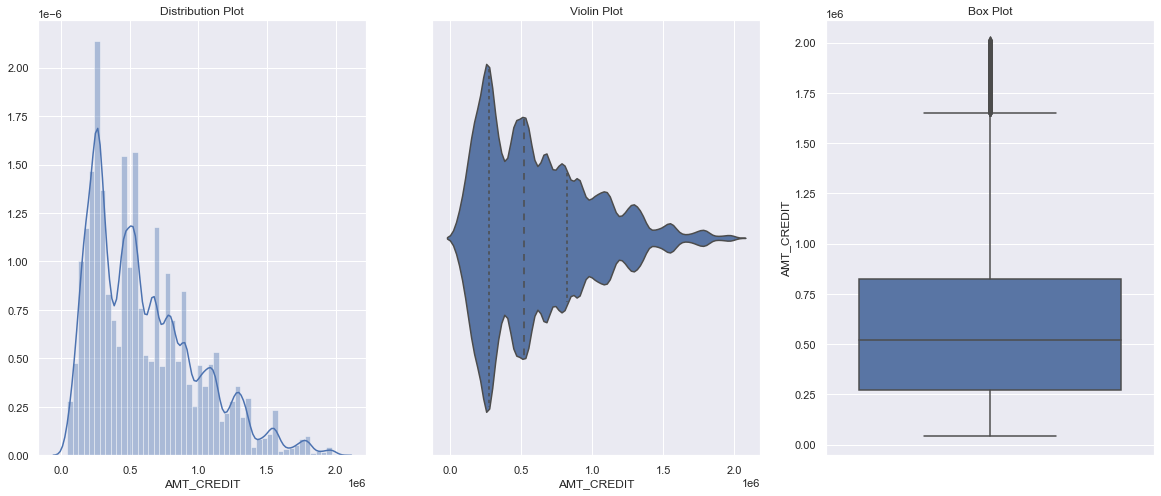


df_1: Target-1


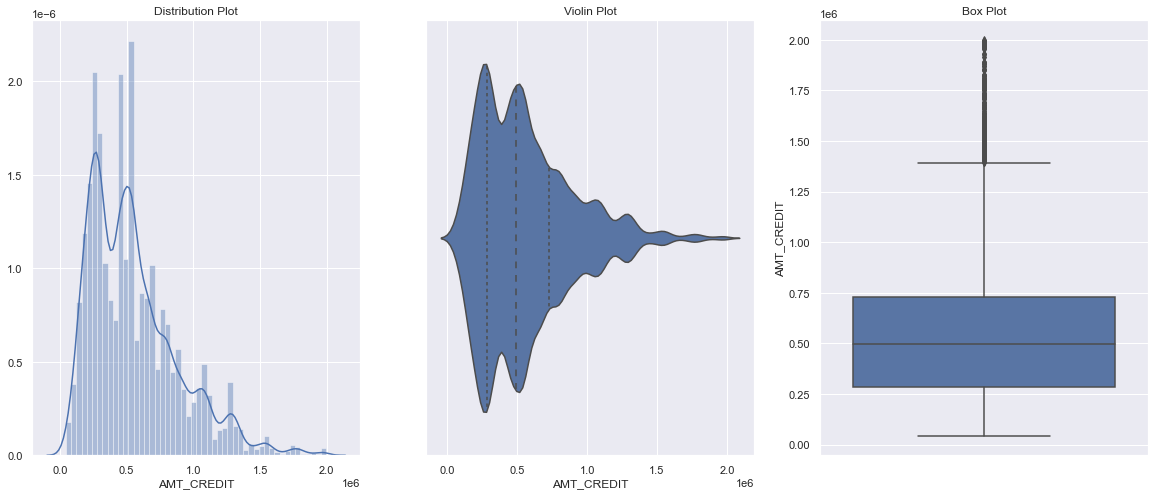

In [47]:
# Performing a univarite analysis to 'AMT_CREDIT' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='AMT_CREDIT',vartype=0)

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='AMT_CREDIT',vartype=0)

<font color='blue'><b>Insights</b>: In both the cases most of the loan ammount application are distributed between 0.2 to 0.7.</font>

df_0: Target-0



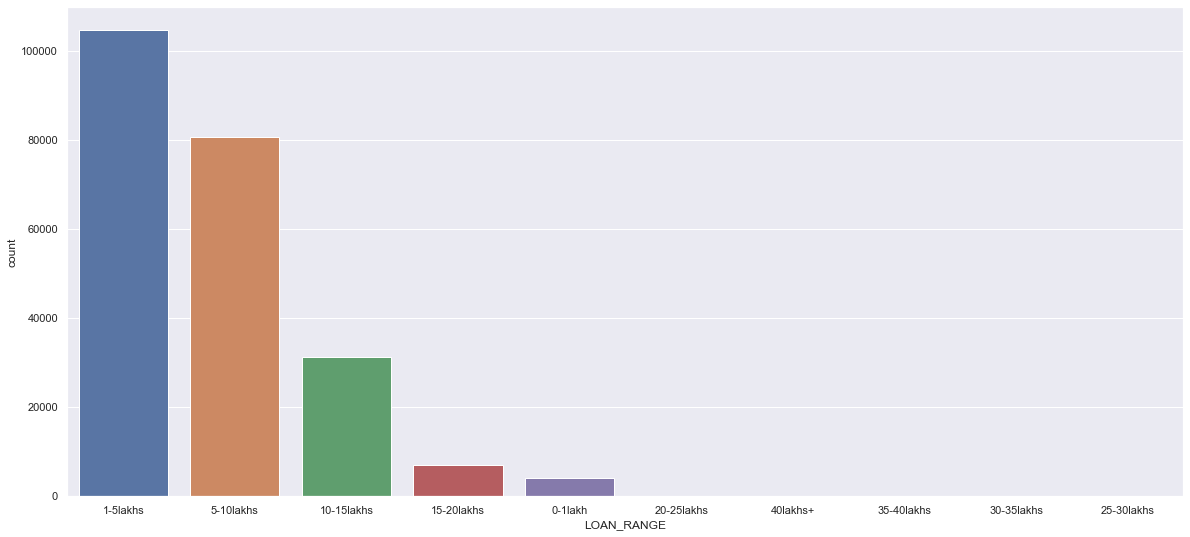


df_1: Target-1


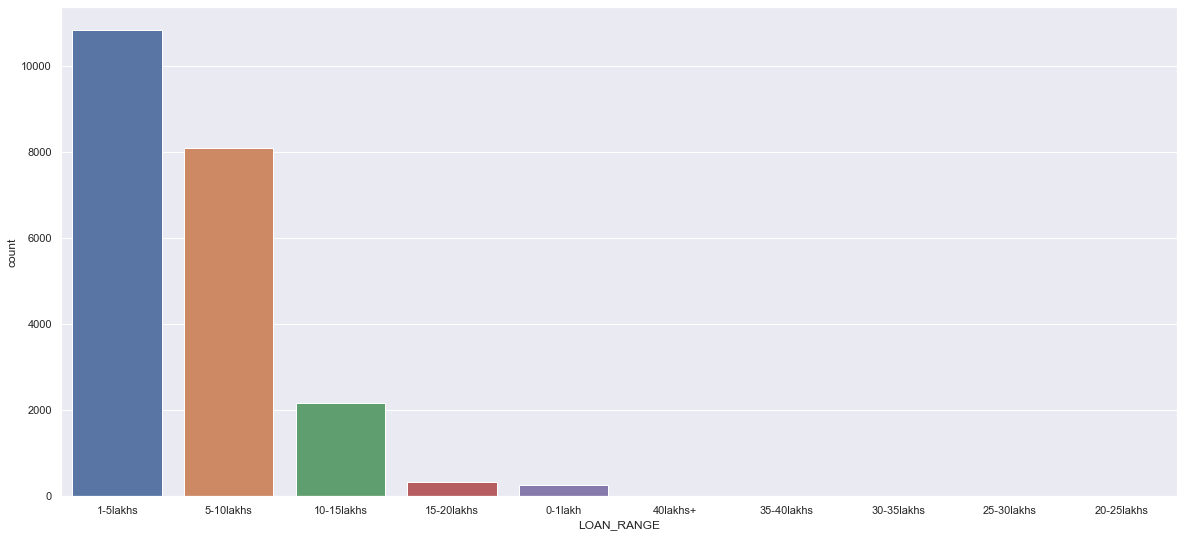

In [48]:
# Performing a univarite analysis to 'LOAN_RANGE' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='LOAN_RANGE',vartype=1)

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='LOAN_RANGE',vartype=1)

<font color='blue'><b>Insights</b>: Most of the loan ammount application are distributed between 1-5lakhs ₹ but in case of Target-1 15-20 lakhs loan amount frequency is less as compared to Target-0.</font>

#### Income Ratio

df_0: Target-0



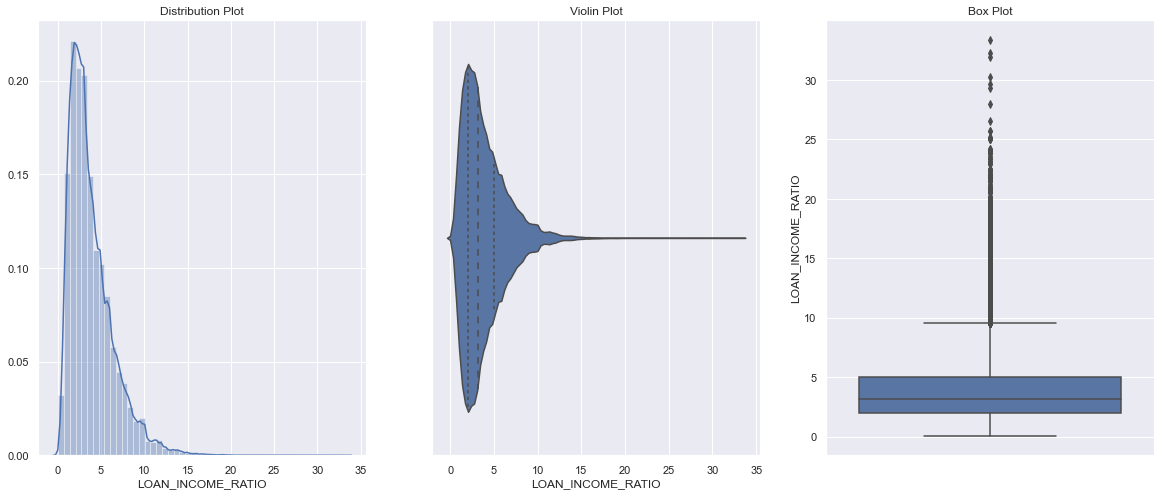


df_1: Target-1


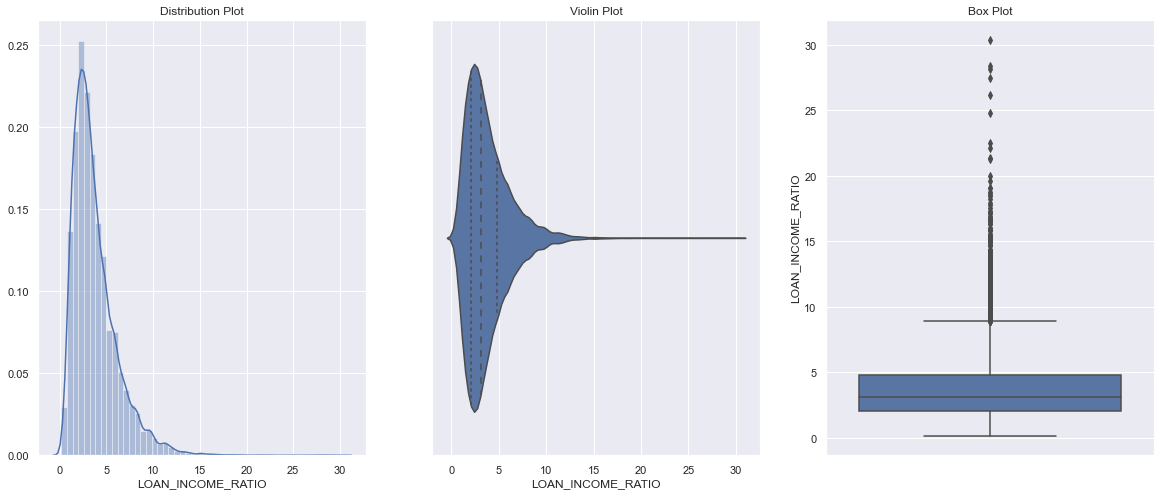

In [49]:
# Performing a univarite analysis to 'LOAN_INCOME_RATIO' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='LOAN_INCOME_RATIO',vartype=0)

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='LOAN_INCOME_RATIO',vartype=0)

<font color='blue'><b>Insights</b>: Both the cases loan ammout ratio is same.</font>

#### Gender

df_0: Target-0



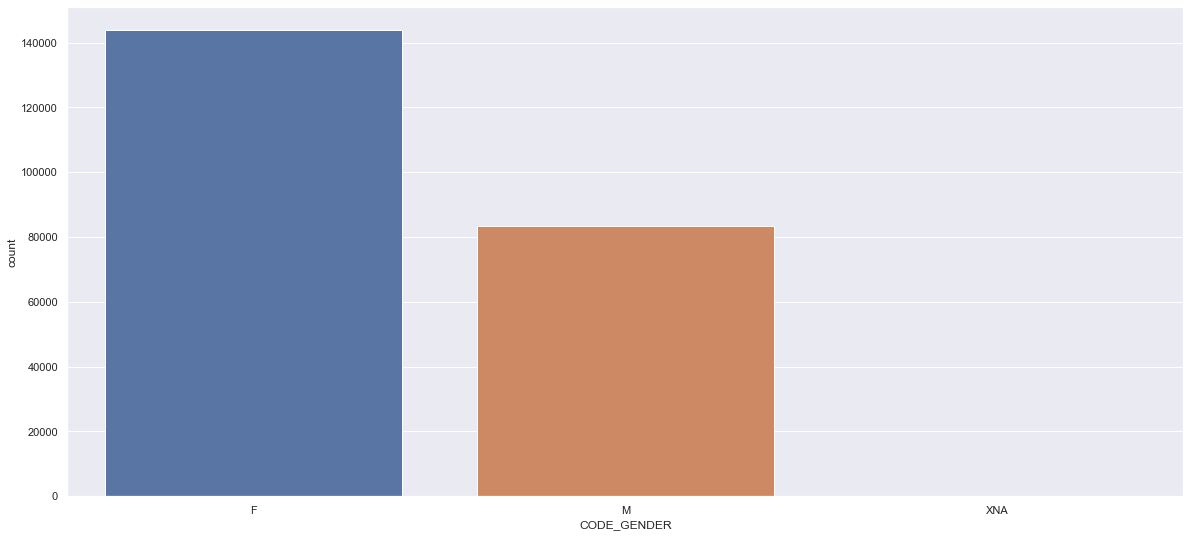


df_1: Target-1


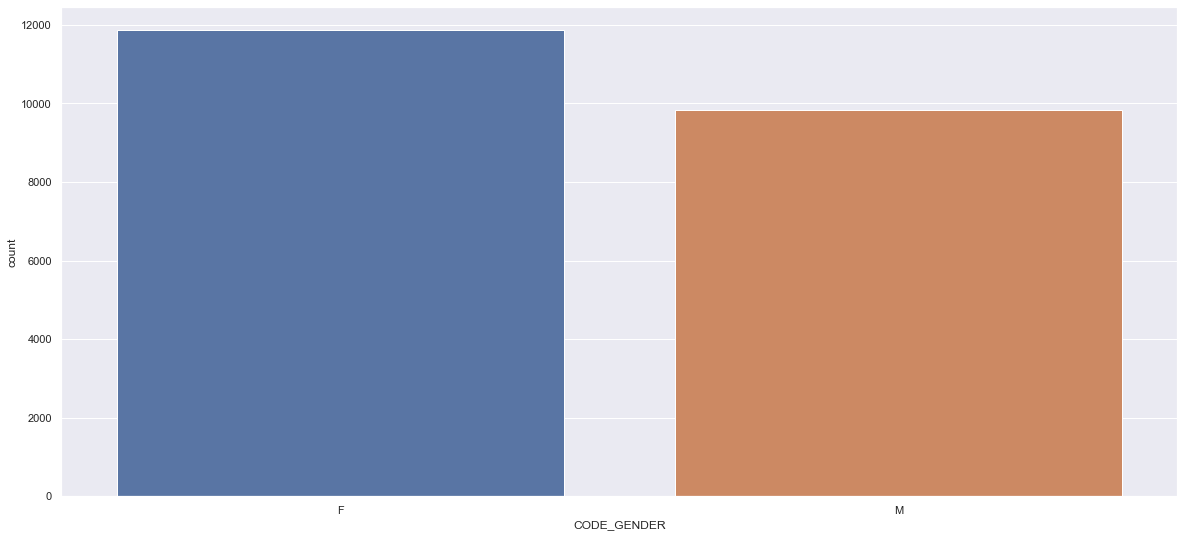

In [50]:
# Performing a univarite analysis to 'LOAN_INCOME_RATIO' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='CODE_GENDER',vartype=1)

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='CODE_GENDER',vartype=1)

<font color='blue'><b>Insights</b>: Gender wise both the casees no as such diffrence.</font>

#### Family Status

df_0: Target-0



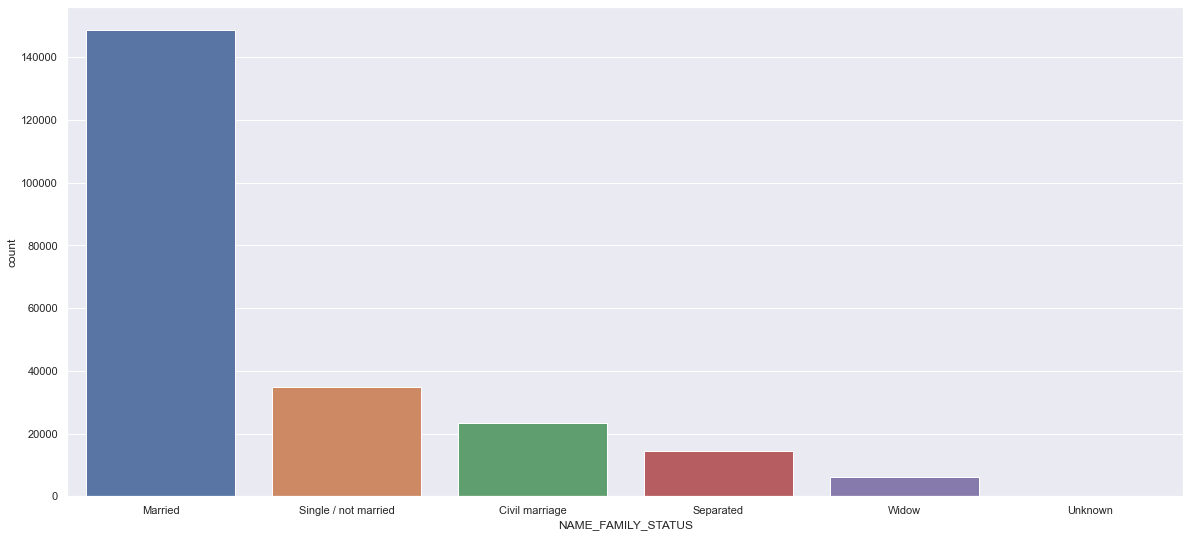


df_1: Target-1


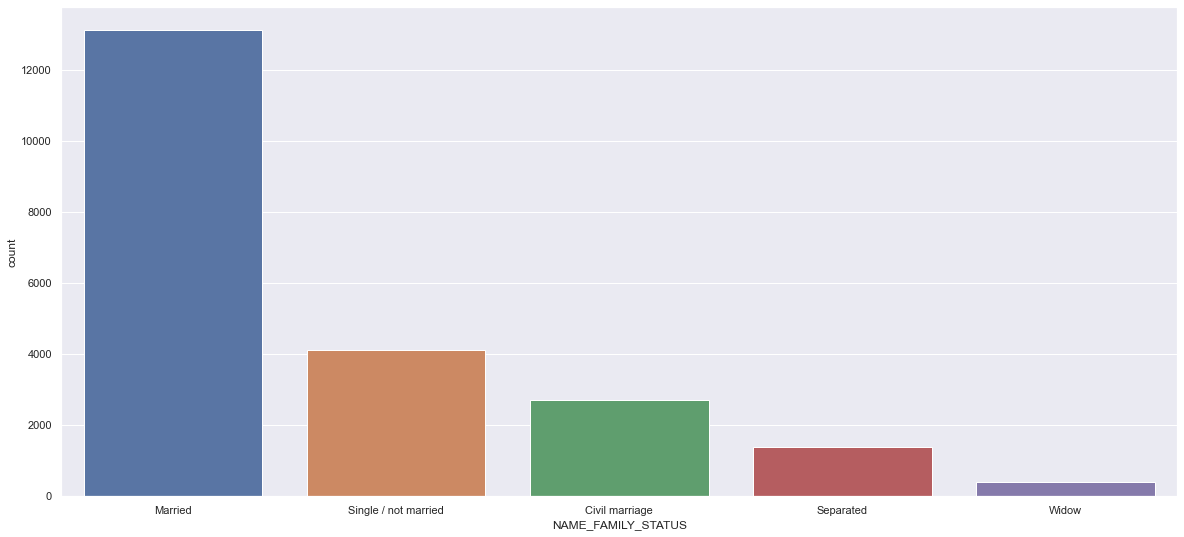

In [51]:
# Performing a univarite analysis to 'LOAN_INCOME_RATIO' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='NAME_FAMILY_STATUS',vartype=1)

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='NAME_FAMILY_STATUS',vartype=1)

<font color='blue'><b>Insights</b>: in the case of Target-1 single/not married person count frequency is higher if we neglect the total row count diffrence.</font>

#### Age Category

df_0: Target-0



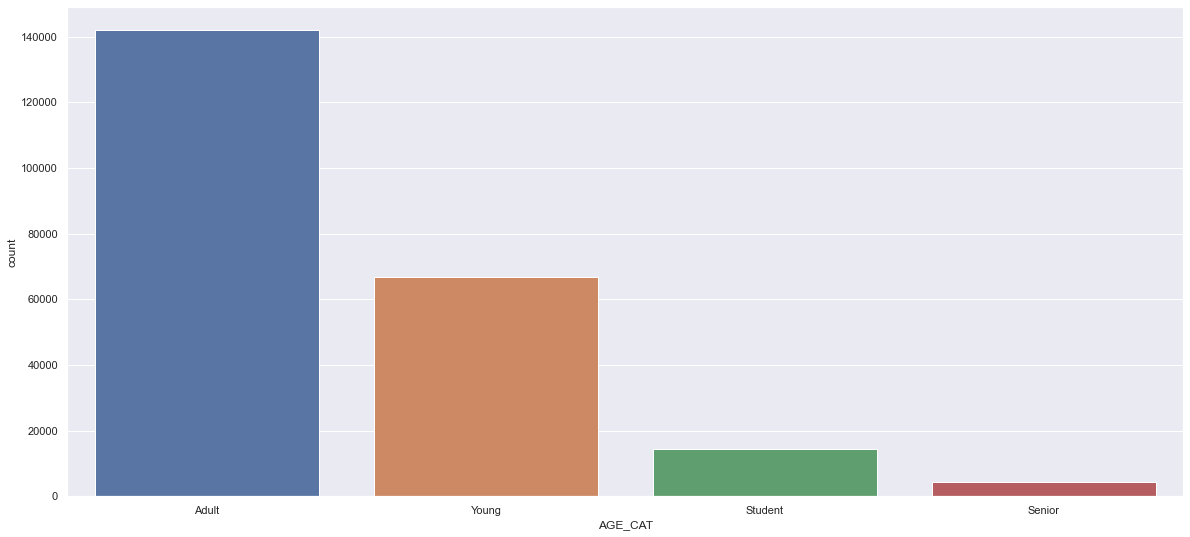


df_1: Target-1


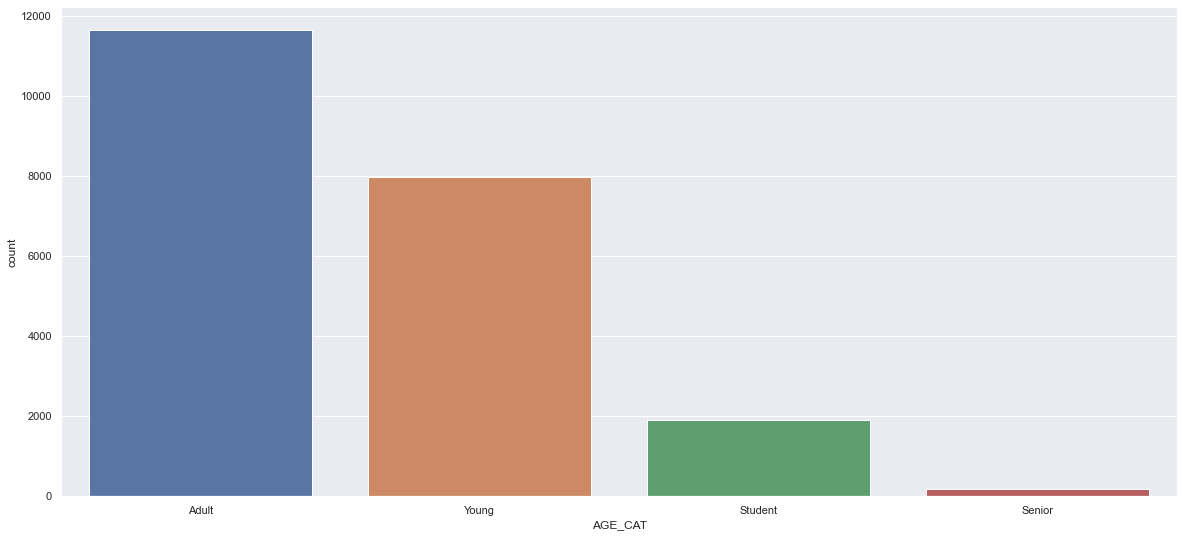

In [52]:
# Performing a univarite analysis to 'AGE_CAT' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='AGE_CAT',vartype=1)

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='AGE_CAT',vartype=1)

<font color='blue'><b>Insights</b>: In the case of Target-1 Young client and Students are finds more payment difficulties </font>

#### Education Type

df_0: Target-0



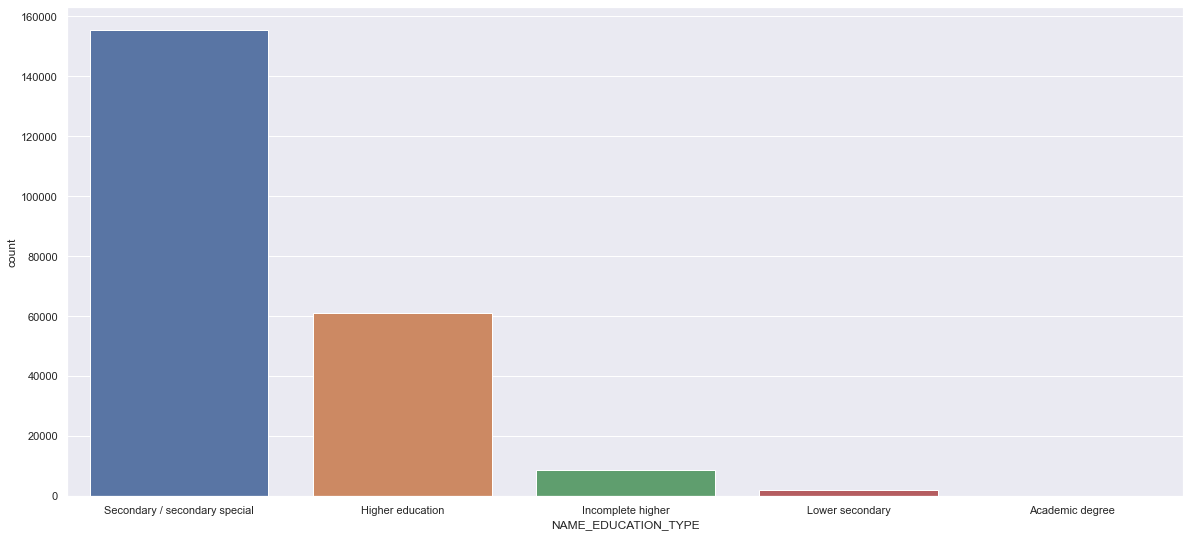


df_1: Target-1


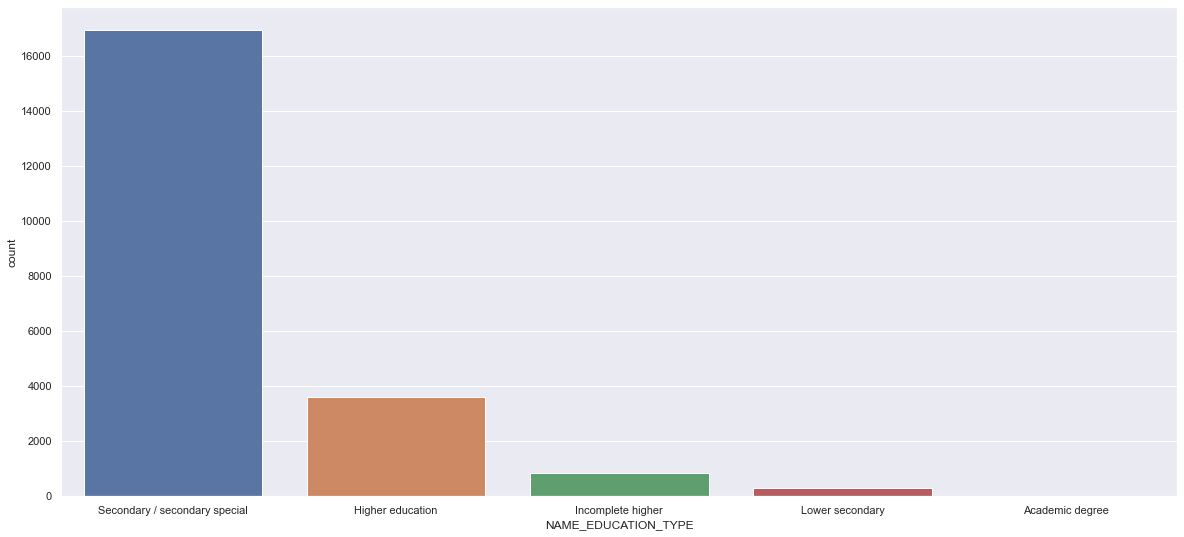

In [53]:
# Performing a univarite analysis to 'NAME_EDUCATION_TYPE' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='NAME_EDUCATION_TYPE',vartype=1)

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='NAME_EDUCATION_TYPE',vartype=1)

<font color='blue'><b>Insights</b>: Education-wise Target-1 underperforms. If we compare the customer, who finds payment difficulties, are not academically good.</font>

#### Housing Type

df_0: Target-0



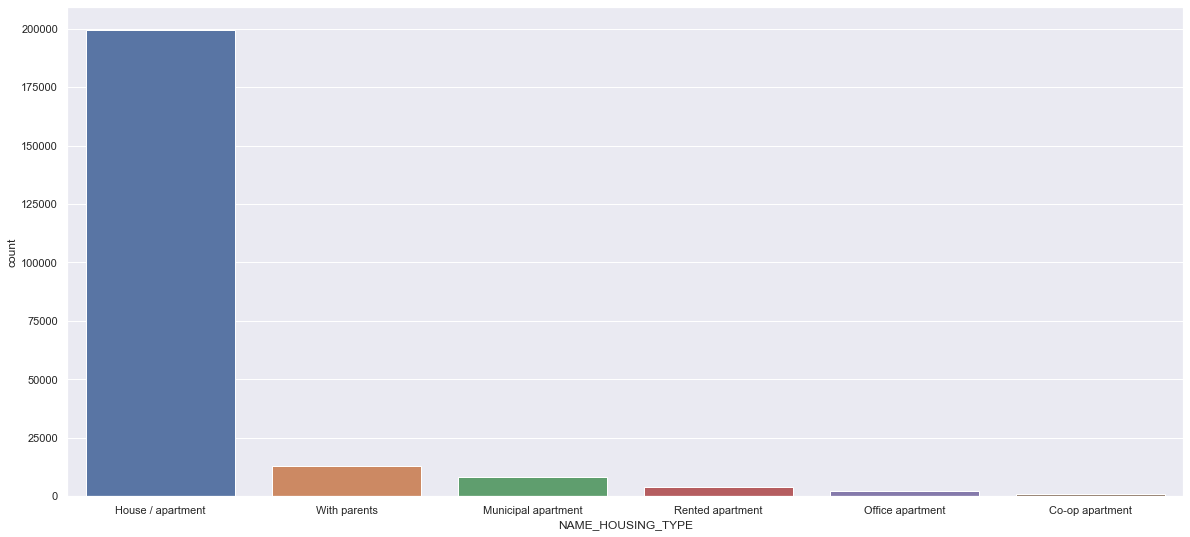


df_1: Target-1


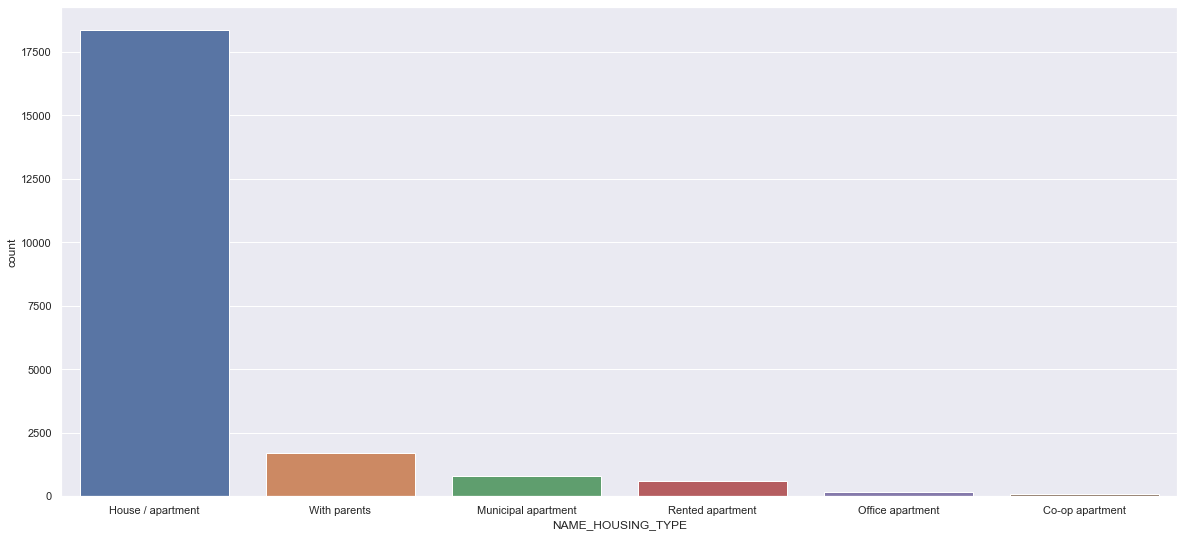

In [54]:
# Performing a univarite analysis to 'NAME_HOUSING_TYPE' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='NAME_HOUSING_TYPE',vartype=1)

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='NAME_HOUSING_TYPE',vartype=1)

<font color='blue'><b>Insights</b>: Housing-wise Target-1 underperforms. If we compare the customer, who finds payment difficulties, With parents is high.</font>

### Bivariate Analysis with Continuous and Categorical Variables

We perform Bivariate analysis in the combination of: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

#### Gender and Education

df_0: Target-0



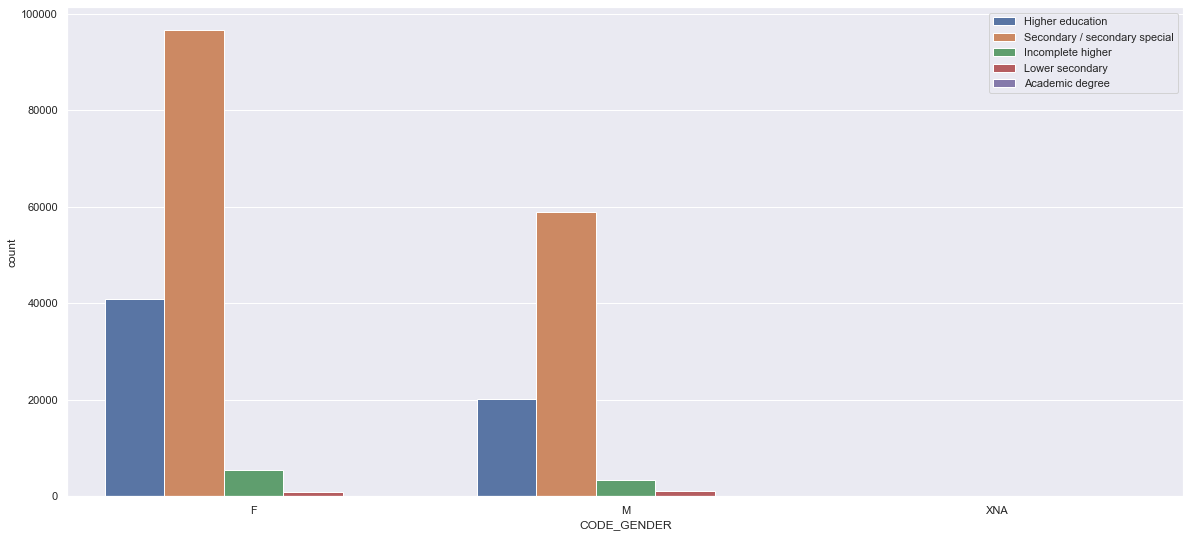


df_1: Target-1


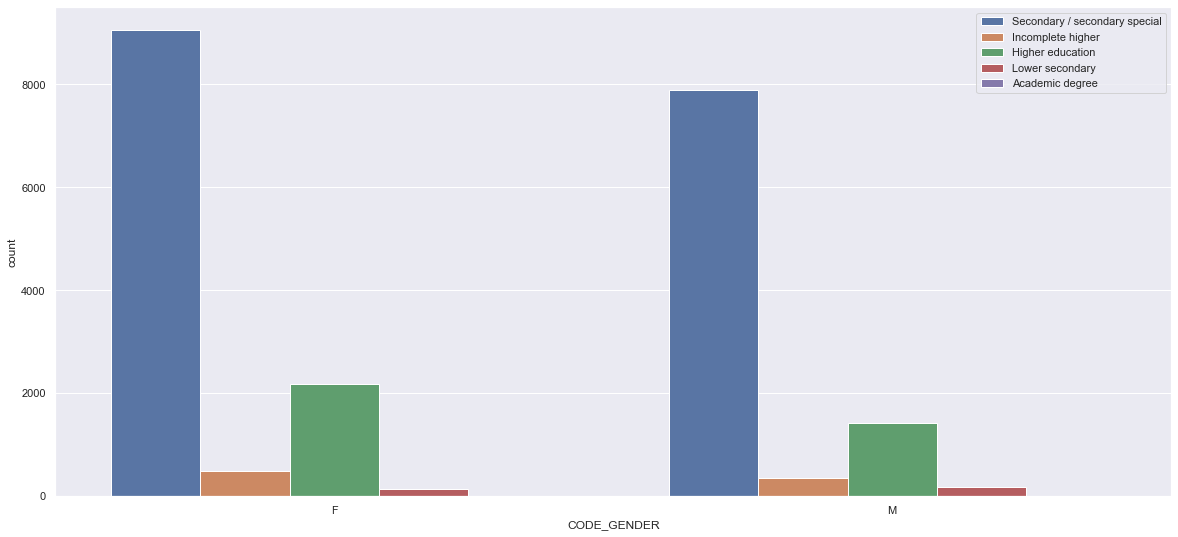

In [55]:
# Performing a Bivariate analysis to 'CODE_GENDER' and 'NAME_EDUCATION_TYPE' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='CODE_GENDER',vartype=1,hue='NAME_EDUCATION_TYPE')

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='CODE_GENDER',vartype=1,hue='NAME_EDUCATION_TYPE')

<font color='blue'><b>Insights</b>:  Target-0 and Target-1 Female and Male frequency of secondary education is high but in Target-1 Higher education is low this can be one of the reason to find a loan payment difficulties.</font>

#### Loan and Age

df_0: Target-0



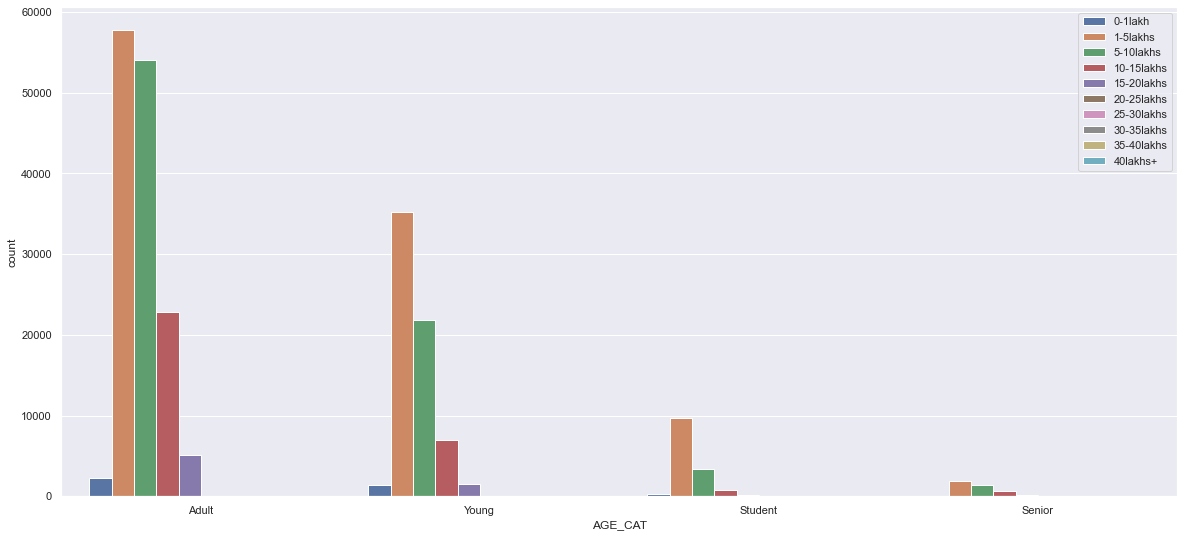


df_1: Target-1


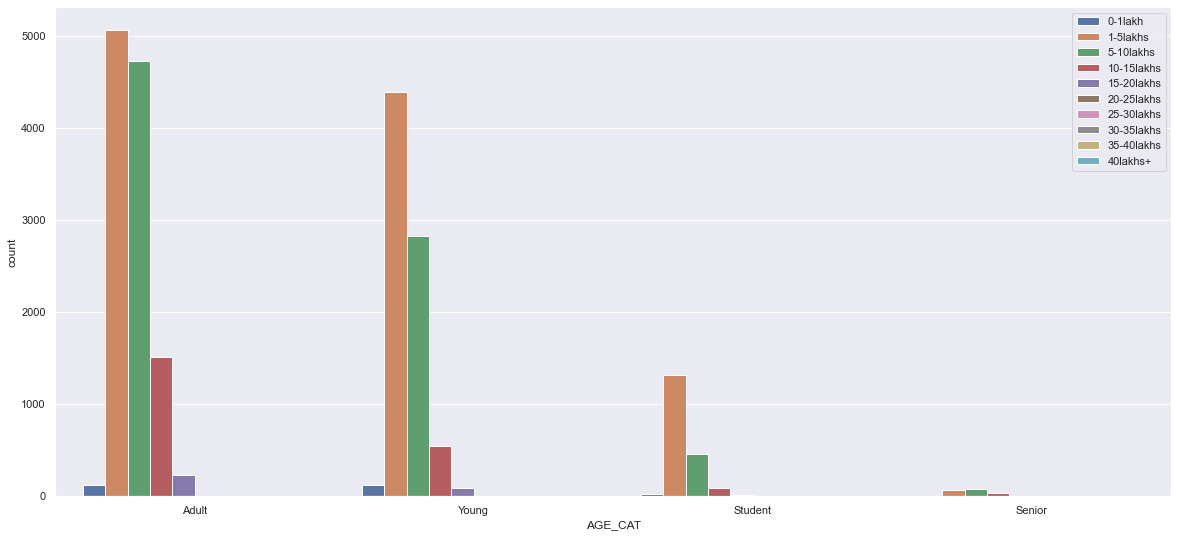

In [56]:
# Performing a Bivariate analysis to 'LOAN_RANGE' and 'AGE_CAT' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='AGE_CAT',vartype=1,hue='LOAN_RANGE')

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='AGE_CAT',vartype=1,hue='LOAN_RANGE')

<font color='blue'><b>Insights</b>:  In Target-1 The Young client whose loan range is 1-5 and 5-10 lakhs as compare to Target-0 faces a payment difficulties.</font>

#### Loan and Client annual Income

df_0: Target-0



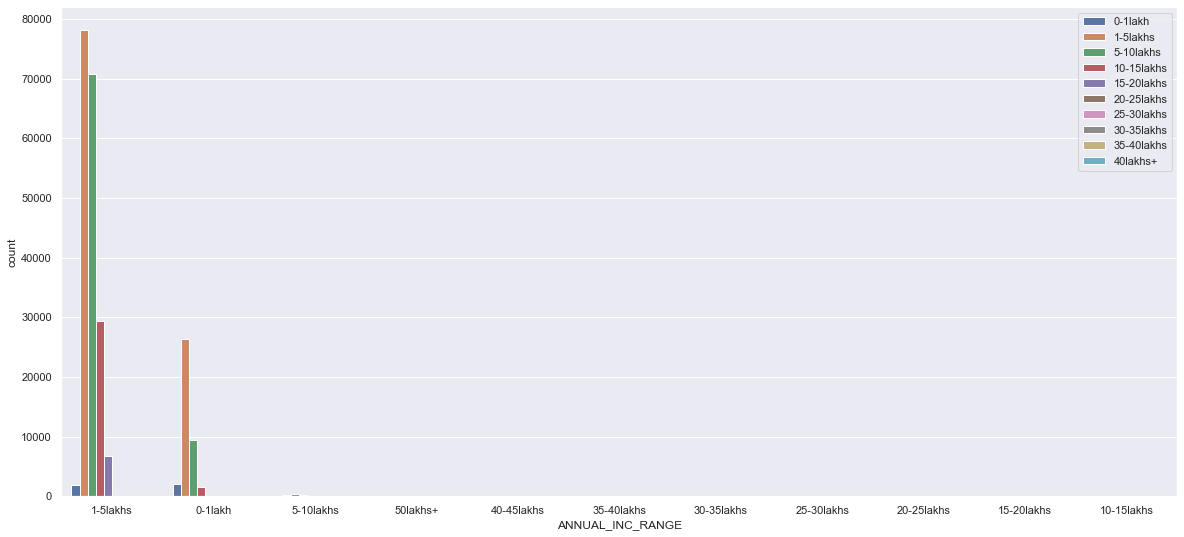


df_1: Target-1


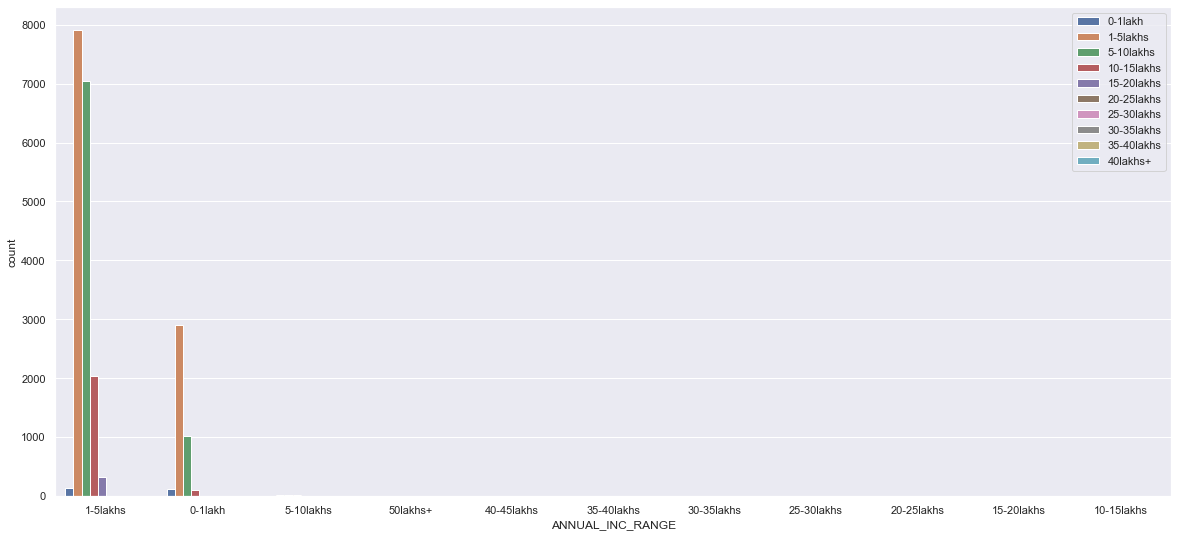

In [57]:
# Performing a Bivariate analysis to 'LOAN_RANGE' and 'ANNUAL_INC_RANGE' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='ANNUAL_INC_RANGE',vartype=1,hue='LOAN_RANGE')

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='ANNUAL_INC_RANGE',vartype=1,hue='LOAN_RANGE')

<font color='blue'><b>Insights</b>: If we observe the annual income of a Target-1 client. Annual income range is in between 0-1 lakhs but the loan amount is 10-15 lakhs the ratio of annual income and loan is not balanced then it leads to payment difficulties.</font>

#### Loan and Occupation

df_0: Target-0



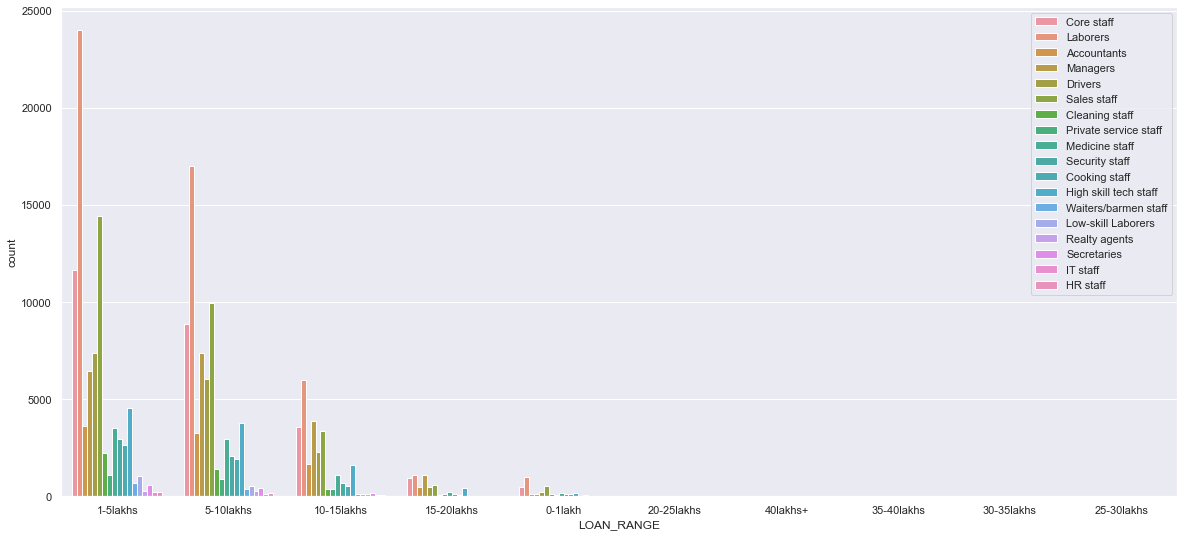


df_1: Target-1


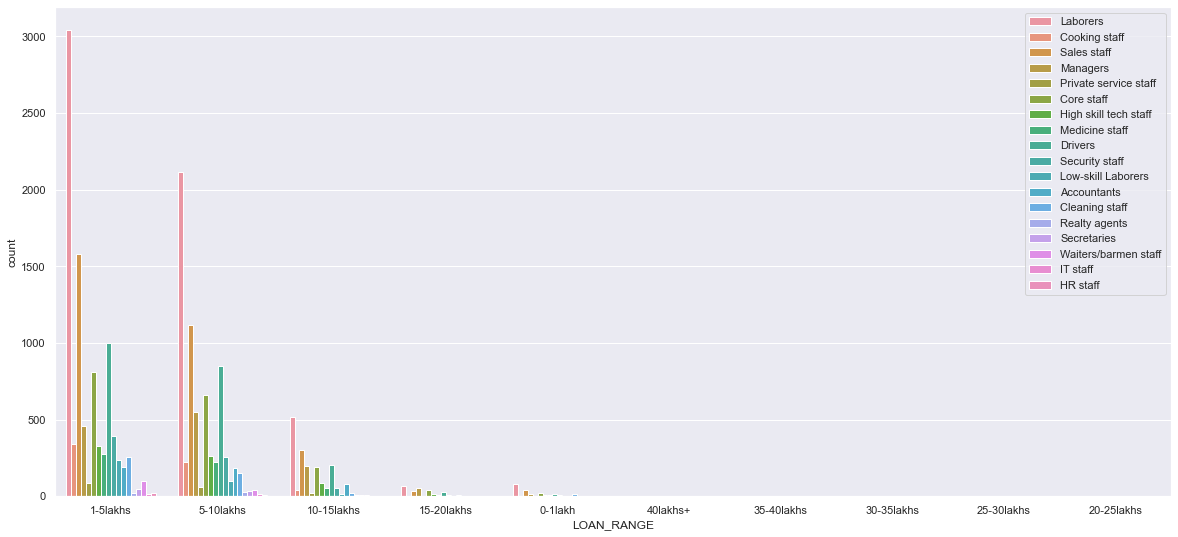

In [58]:
# Performing a Bivariate analysis to 'LOAN_RANGE' and 'OCCUPATION_TYPE' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='LOAN_RANGE',vartype=1,hue='OCCUPATION_TYPE')

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='LOAN_RANGE',vartype=1,hue='OCCUPATION_TYPE')

<font color='blue'><b>Insights</b>: In Target-1 Most of the client are from Medical staff, low skilled laborers, Drivers, and Security staff professional background who faces a payment difficulties.</font>

#### Family Size and Annual income

df_0: Target-0



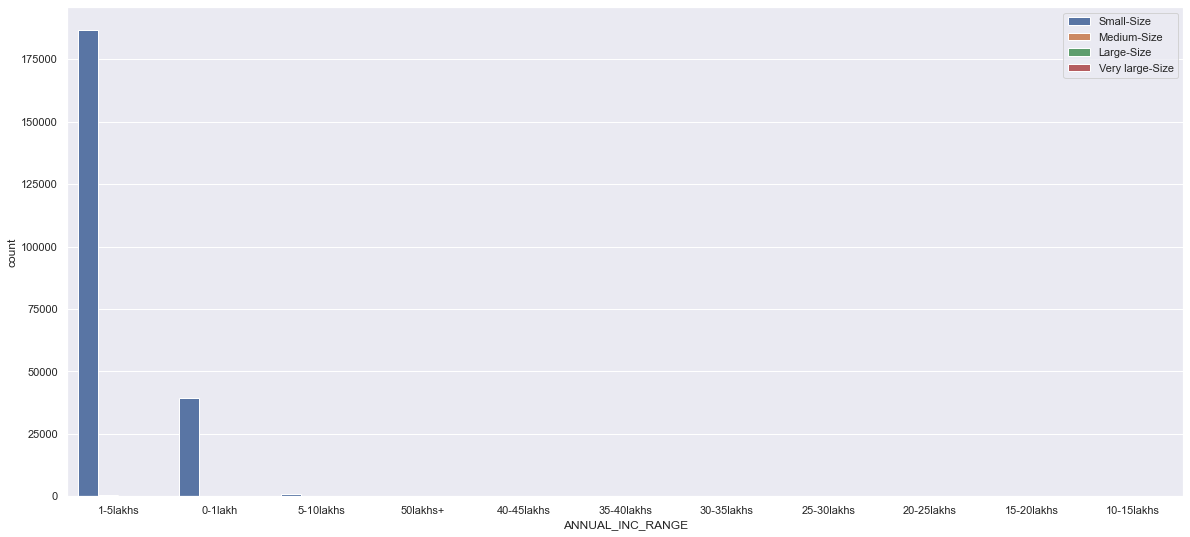


df_1: Target-1


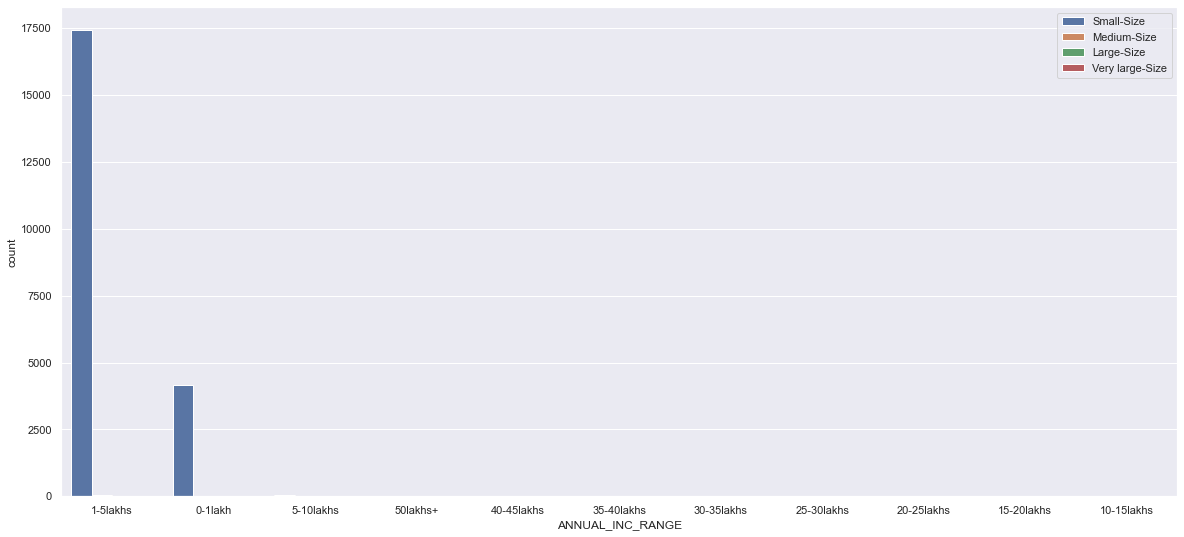

In [59]:
# Performing a Bivariate analysis to 'Family Size' and 'ANNUAL_INC_RANGE' in both Target-0 and Target-1 dataframe

print('df_0: Target-0\n')
univariate_analysis(df=df_0,col='ANNUAL_INC_RANGE',vartype=1,hue='FAMILY_SIZE_CAT')

print('\ndf_1: Target-1')
univariate_analysis(df=df_1,col='ANNUAL_INC_RANGE',vartype=1,hue='FAMILY_SIZE_CAT')

<font color='blue'><b>Insights</b>: In Target-1 Most of the client are bilongs to small family size that mean dependence is maximum  5 in 1 peopel, with an annual income between 0-1 lakh to 1-5 lakh who are facing payment difficulties.</font>

#### Correlation Matrix : All Continuos(Numeric) Variables

In [114]:
loan = application[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'BIRTH_YEARS', 'EMPLOYED_YEARS', 'LOAN_INCOME_RATIO', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN','REGION_POPULATION_RELATIVE']]
loan_correlation = loan.corr()
loan_correlation

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,BIRTH_YEARS,EMPLOYED_YEARS,LOAN_INCOME_RATIO,CNT_FAM_MEMBERS,CNT_CHILDREN,REGION_POPULATION_RELATIVE
AMT_INCOME_TOTAL,1.0000,0.3711,0.4478,0.3768,0.0590,0.0366,-0.2760,-0.0089,-0.0169,0.1876
AMT_CREDIT,0.3711,1.0000,0.7530,0.9850,0.1598,0.0916,0.6891,0.0391,-0.0177,0.0877
AMT_ANNUITY,0.4478,0.7530,1.0000,0.7567,0.0906,0.0511,0.4157,0.0435,-0.0061,0.1061
AMT_GOODS_PRICE,0.3768,0.9850,0.7567,1.0000,0.1549,0.0940,0.6674,0.0372,-0.0218,0.0919
BIRTH_YEARS,0.0590,0.1598,0.0906,0.1549,1.0000,0.3514,0.1254,-0.1721,-0.2370,0.0436
EMPLOYED_YEARS,0.0366,0.0916,0.0511,0.0940,0.3514,1.0000,0.0715,-0.0289,-0.0609,-0.0037
LOAN_INCOME_RATIO,-0.2760,0.6891,0.4157,0.6674,0.1254,0.0715,1.0000,0.0618,0.0043,-0.0339
CNT_FAM_MEMBERS,-0.0089,0.0391,0.0435,0.0372,-0.1721,-0.0289,0.0618,1.0000,0.8932,-0.0291
CNT_CHILDREN,-0.0169,-0.0177,-0.0061,-0.0218,-0.2370,-0.0609,0.0043,0.8932,1.0000,-0.0307
REGION_POPULATION_RELATIVE,0.1876,0.0877,0.1061,0.0919,0.0436,-0.0037,-0.0339,-0.0291,-0.0307,1.0000


#### HeatMap: All continuos variables

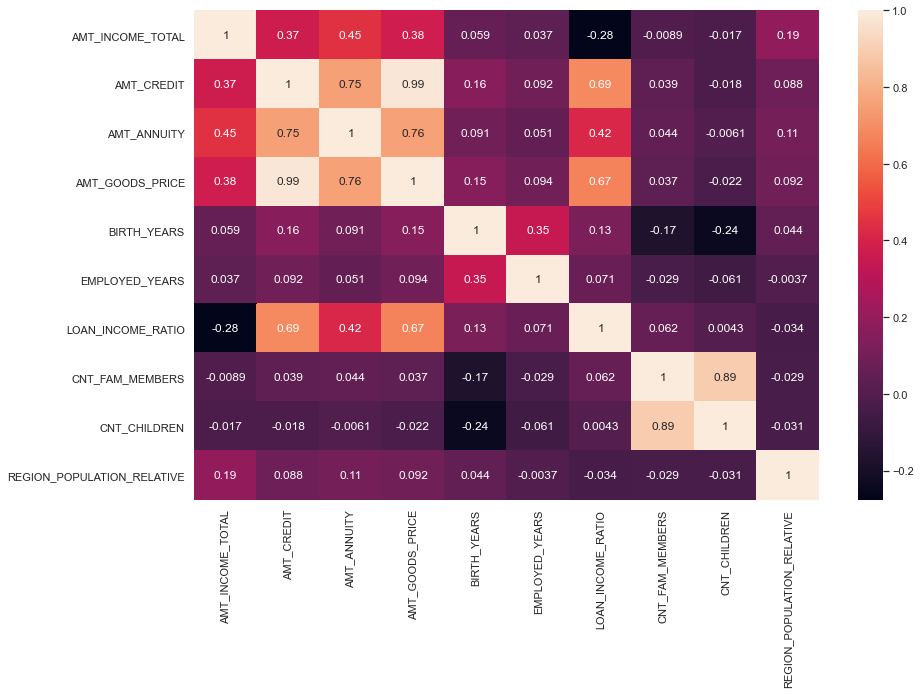

In [115]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

<font color='blue'><b>Insights</b>: It is clear from the Heatmap that how <b>'AMT_INCOME_TOTAL', 'EMPLOYED_YEARS', 'LOAN_INCOME_RATIO', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN','REGION_POPULATION_RELATIVE'</b> are closely <b>interrelated.</b></font>

## Data Cleaning and Manipulation on `previous_application data`

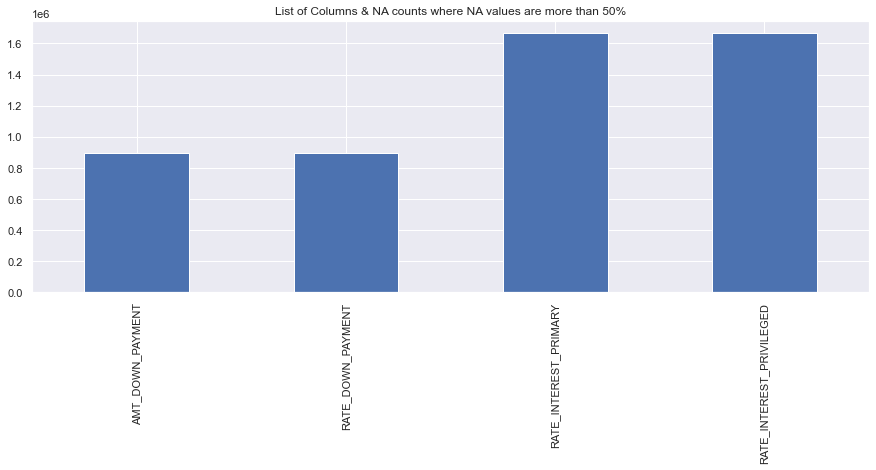

Count of NA columns is : 4


In [60]:
# List of Columns & NA counts where NA values are more than 50%

NA_col = pre_application.isnull().sum()
NA_col = NA_col[NA_col.values >=(0.5*len(pre_application))]
plt.figure(figsize=(15,5))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()
print('Count of NA columns is :', len(NA_col))

<font color='blue'><b>Insights</b>: Insights: So we can see from the above plot that there are 4 columns in the dataset where NA values are more then 50%.
</font>

As we can see there are 1670214 Rows and 37 Columns in the dataset, it will be very difficult to look at each column one by one & find the NA or missing values. So we find out all columns where missing values are more than certain percentage, let's say 50%. We will remove those columns as it is not feasable to impute missing values for those columns.

In [61]:
# Droping the null columns

pre_application = removeNulls(pre_application, axis =1,percent = 0.5)

Number of Columns dropped	:  4

Old dataset rows,columns (1670214, 37) 
New dataset rows,columns (1670214, 33)


In [62]:
# List of Columns & NA counts where NA values are around 13% or less

NA_col = pre_application.isnull().sum()
NA_col1 = NA_col[NA_col.values <=(0.13*len(pre_application))]
NA_col2 = NA_col1[NA_col1.values >0]
print(NA_col2)
print('\nCount of NA columns is :', len(NA_col2))

AMT_CREDIT               1
PRODUCT_COMBINATION    346
dtype: int64

Count of NA columns is : 2


*There are 10 columns in the dataset where NA values are 13% or less. we perform impute process to hendal the missing values.*

- AMT_CREDIT
- PRODUCT_COMBINATION

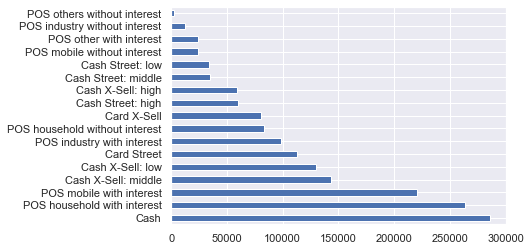

In [63]:
# missing values in categorical variable

pre_application.PRODUCT_COMBINATION.value_counts().plot(kind ='barh')
plt.show()

<font color='blue'><b>Insights</b>: `Cash` is a most frequent value in `PRODUCT_COMBINATION` we can replace the missing value with `Cash`.</font> 

In [64]:
# missing values in continuous variable

pre_application.AMT_CREDIT.describe()

count   1670213.0000
mean     196114.0212
std      318574.6165
min           0.0000
25%       24160.5000
50%       80541.0000
75%      216418.5000
max     6905160.0000
Name: AMT_CREDIT, dtype: float64

In [65]:
pre_application.AMT_CREDIT.mode()

0   0.0000
dtype: float64

<font color='blue'><b>Insights</b>: `AMT_CREDIT` has maximum amount is 6905160 which effect the mean value so we can use a amount that appears most frequently in a data set to replace the missing values but the problem is the 0.0000 is the most frequent ammount in `AMT_CREDIT` data set that means loan is declined by the bank for the clinet whose `AMT_CREDIT` value is null.In that case we can replace the missing value with `AMT_GOODS_PRICE` if loan is approved else 0.0000. </font> 

In [66]:
# checking the data type of the each columns in dataframe

pre_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP         

### Data type casting and value modification to some important columns which is important for business perspective and analysis.

In [67]:
# removing the -ve sign from 'DAYS_DECISION'
pre_application.DAYS_DECISION = pre_application.DAYS_DECISION.apply(lambda x: abs(x))

#### Checking a outliers for a 5 numerical variables

- AMT_ANNUITY
- AMT_APPLICATION
- AMT_CREDIT
- AMT_GOODS_PRICE
- DAYS_DECISION

In [68]:
pre_application.AMT_ANNUITY.describe() 

count   1297979.0000
mean      15955.1207
std       14782.1373
min           0.0000
25%        6321.7800
50%       11250.0000
75%       20658.4200
max      418058.1450
Name: AMT_ANNUITY, dtype: float64

In [69]:
pre_application.AMT_APPLICATION.describe() 

count   1670214.0000
mean     175233.8604
std      292779.7624
min           0.0000
25%       18720.0000
50%       71046.0000
75%      180360.0000
max     6905160.0000
Name: AMT_APPLICATION, dtype: float64

In [70]:
pre_application.AMT_CREDIT.describe() 

count   1670213.0000
mean     196114.0212
std      318574.6165
min           0.0000
25%       24160.5000
50%       80541.0000
75%      216418.5000
max     6905160.0000
Name: AMT_CREDIT, dtype: float64

In [71]:
pre_application.AMT_GOODS_PRICE.describe() 

count   1284699.0000
mean     227847.2793
std      315396.5579
min           0.0000
25%       50841.0000
50%      112320.0000
75%      234000.0000
max     6905160.0000
Name: AMT_GOODS_PRICE, dtype: float64

In [72]:
pre_application.DAYS_DECISION.describe() 


count   1670214.0000
mean        880.6797
std         779.0997
min           1.0000
25%         280.0000
50%         581.0000
75%        1300.0000
max        2922.0000
Name: DAYS_DECISION, dtype: float64

<font color='blue'><b>Insights</b>:Decisions of longer days may be a reason for cancellation and unused debt.</font> 

### Derived Metrics

<font color='blue'>**We will now derive some new columns based on our business understanding that will be helpful in our analysis.** </font> 

Create Bins for range of Loan Amount

In [94]:
bins = [0, 100000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000]
slot = ['<1lakh', '1-5lakhs', '5-10lakhs', '10-15lakhs', '15-20lakhs','20-25lakhs', '25-30lakhs', '30-35lakhs', '35-40lakhs', '40lakhs+']
pre_application['LOAN_RANGE'] = pd.cut(pre_application['AMT_CREDIT'], bins, labels=slot)

#### Analysis

**Checking the imbalance percentage in NAME_CONTRACT_STATUS Variable**

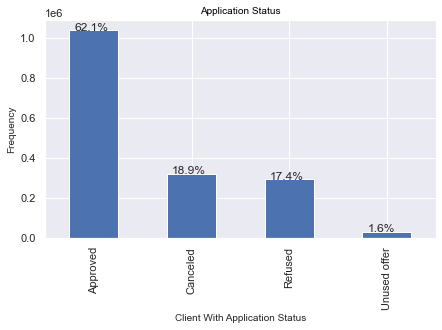

In [74]:
plt.figure(figsize=[7,4])
ax = pre_application['NAME_CONTRACT_STATUS'].value_counts().plot(kind = 'bar')
plt.title('Application Status',fontsize = 10, color='black')
plt.xlabel('Client With Application Status',fontsize = 10)
plt.ylabel('Frequency',fontsize = 10)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()*100)/float(len(pre_application))), (p.get_x()+0.05, p.get_height()+20))       
plt.show()

<font color='blue'><b>Insights</b>: `NAME_CONTRACT_STATUS` variable is imbalanced as per the graph 62.1% client application Approved by the bank and 18.9% application cancelled by client and 17.4% loan application rejected by company and 1.6% loan application cancelled by the client in the different stages of the process.</font> 

#### Dividing the application dataset into two dataframe df_Approved and df_Not_Approved


In [105]:
df_Approved = pre_application[pre_application['NAME_CONTRACT_STATUS']=='Approved']
df_Not_Approved = pre_application[pre_application['NAME_CONTRACT_STATUS']!='Approved']

In [76]:
print('Count of the client loan application approved :',df_Approved.shape[0])
print('Count of the client loan application Not-approved :',df_Not_Approved.shape[0])

Count of the client loan application approved : 1036781
Count of the client loan application Not-approved : 633433


### Univariate and Bivariate Analysis

**Continuous Variables**

In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot, Violin Plot etc.

**Categorical Variables**

For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

### Univariate Analysis with Continuous and Categorical Variables

#### Loan amount

df_Approved: 



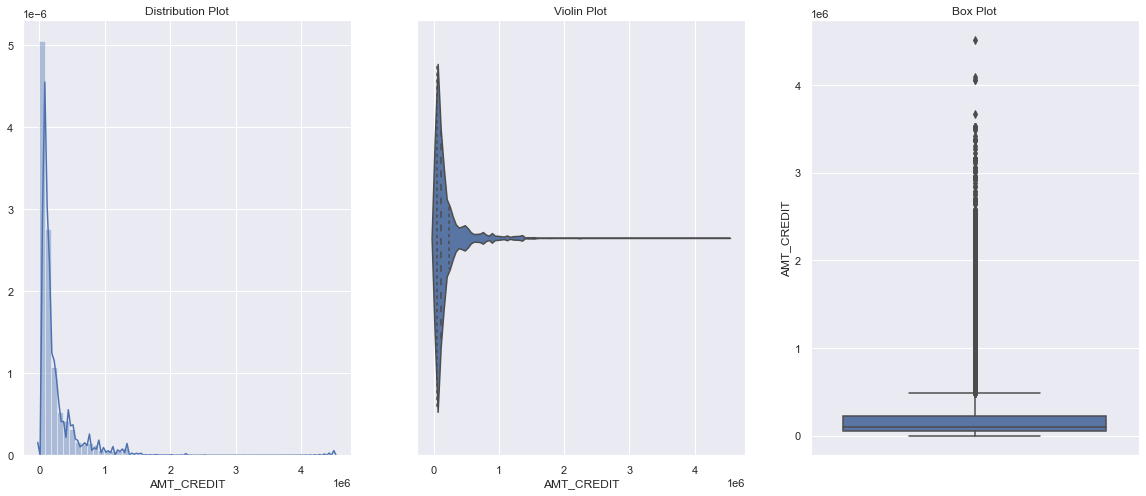


df_Not_Approved:


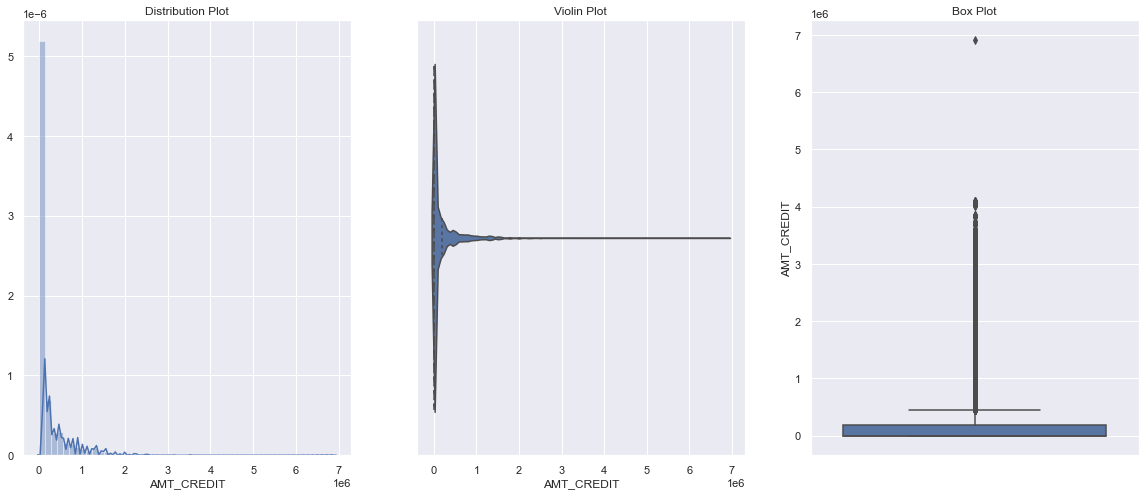

In [77]:
# Performing a univarite analysis to 'AMT_CREDIT' in both df_Approved and df_Not_Approved dataframe

print('df_Approved: \n')
univariate_analysis(df=df_Approved,col='AMT_CREDIT',vartype=0)

print('\ndf_Not_Approved:')
univariate_analysis(df=df_Not_Approved,col='AMT_CREDIT',vartype=0)

df_Approved: 



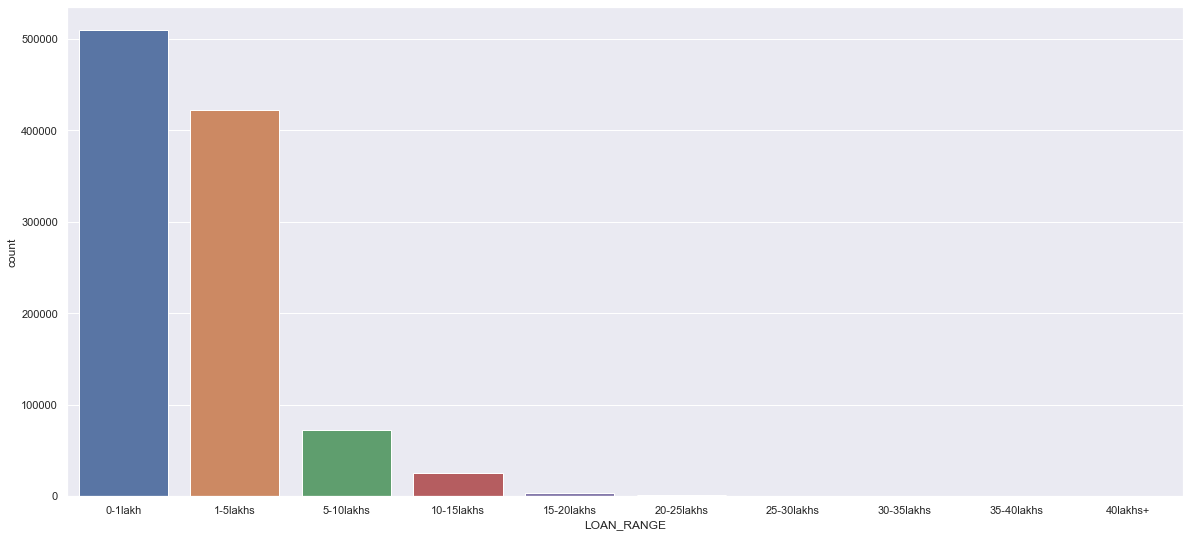


df_Not_Approved:


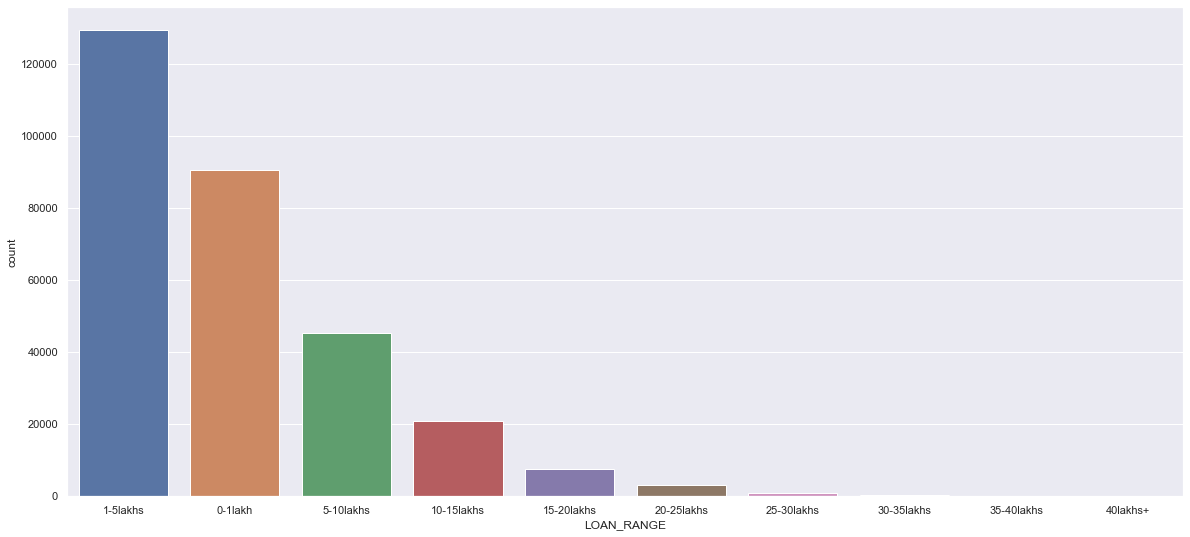

In [78]:
# Performing a univarite analysis to 'LOAN_RANGE' in both df_Approved and df_Not_Approved dataframe

print('df_Approved: \n')
univariate_analysis(df=df_Approved,col='LOAN_RANGE',vartype=1)

print('\ndf_Not_Approved:')
univariate_analysis(df=df_Not_Approved,col='LOAN_RANGE',vartype=1)

<font color='blue'><b>Insights</b>: Most of the loan which not approved is in between 1-5lakhs</font> 

#### Reject Reason


df_Not_Approved:


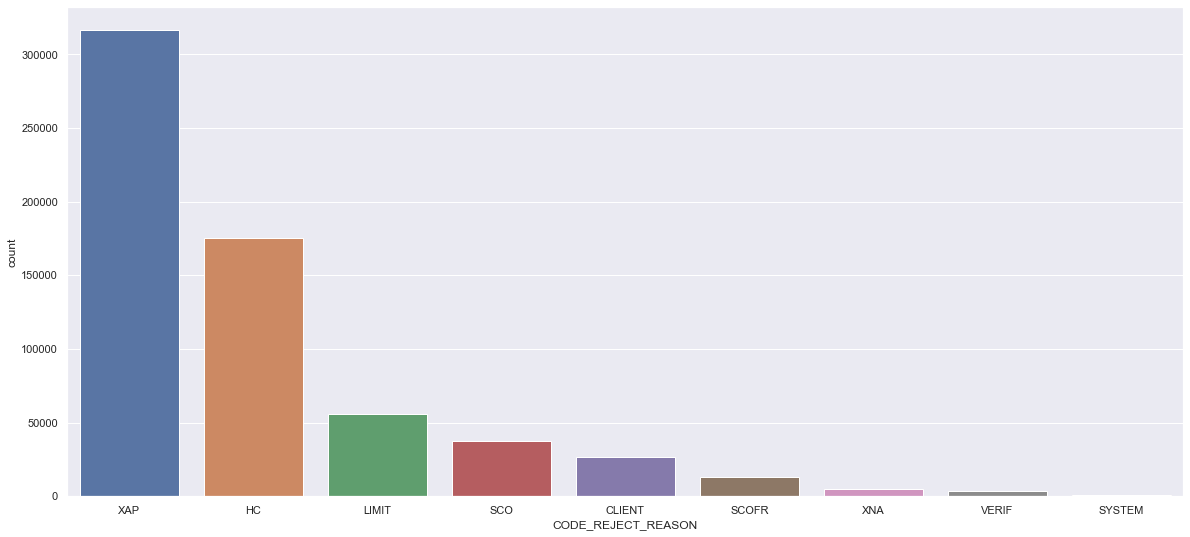

In [79]:
# Performing a univarite analysis to 'CODE_REJECT_REASON' in df_Not_Approved dataframe

print('\ndf_Not_Approved:')
univariate_analysis(df=df_Not_Approved,col='CODE_REJECT_REASON',vartype=1)

<font color='blue'><b>Insights</b>: Most of the loan which not approved because of XAP (Not applicable for the loan) means  loan is declined by the bank </font> 

#### Client Type

df_Approved: 



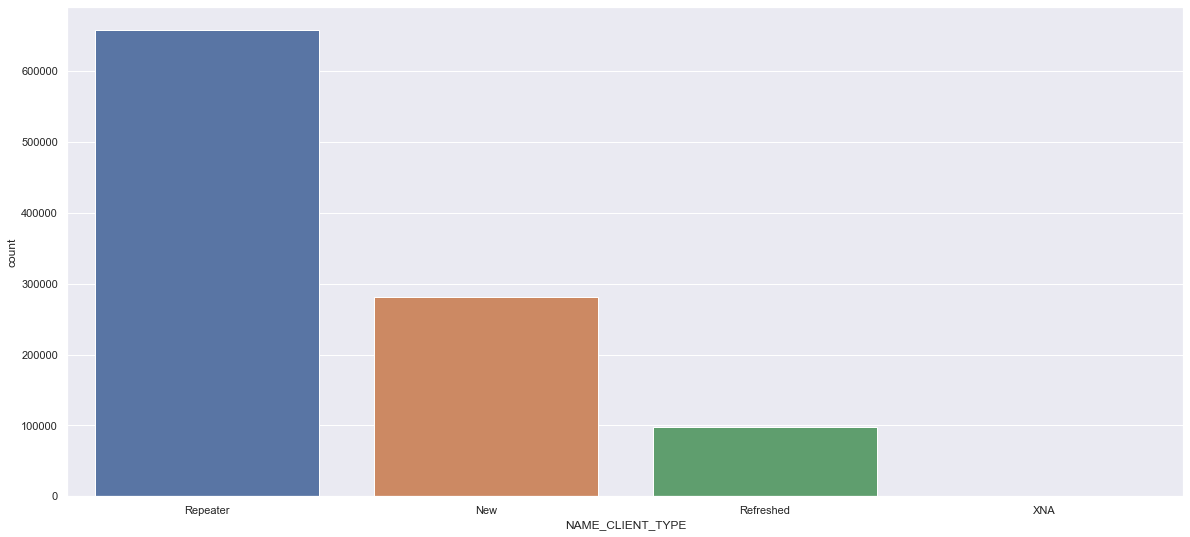


df_Not_Approved:


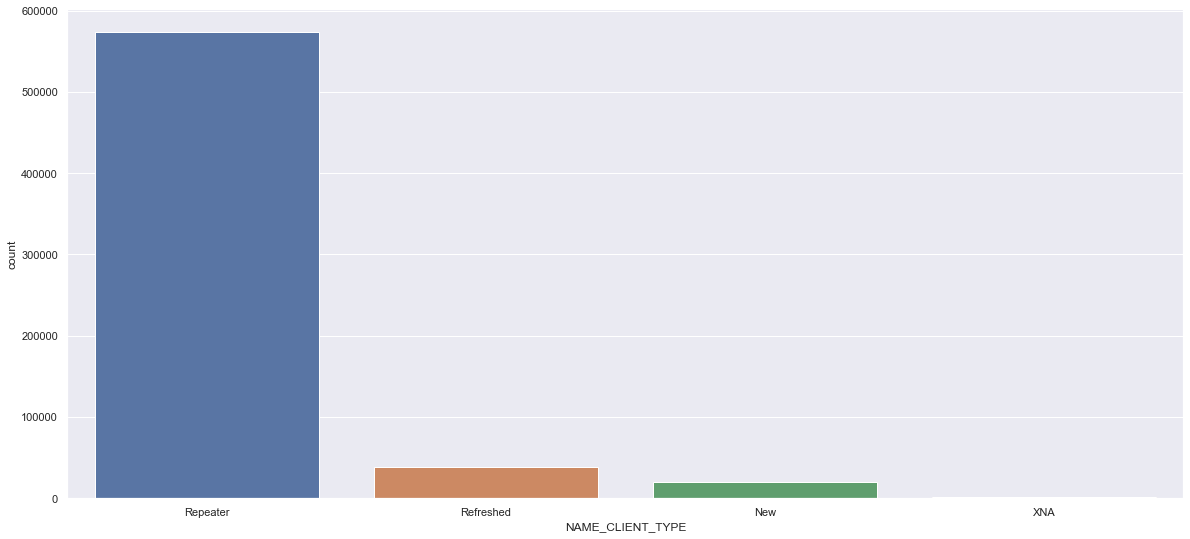

In [80]:
# Performing a univarite analysis to 'NAME_CLIENT_TYPE' in both df_Approved and df_Not_Approved dataframe

print('df_Approved: \n')
univariate_analysis(df=df_Approved,col='NAME_CLIENT_TYPE',vartype=1)

print('\ndf_Not_Approved:')
univariate_analysis(df=df_Not_Approved,col='NAME_CLIENT_TYPE',vartype=1)

<font color='blue'><b>Insights</b>: Most of the client is repeater in both the cases. And in the case of Not-approved loan the count of client who is Refreshed and New is less as compared to Approved.</font> 

#### Type Suite

df_Approved: 



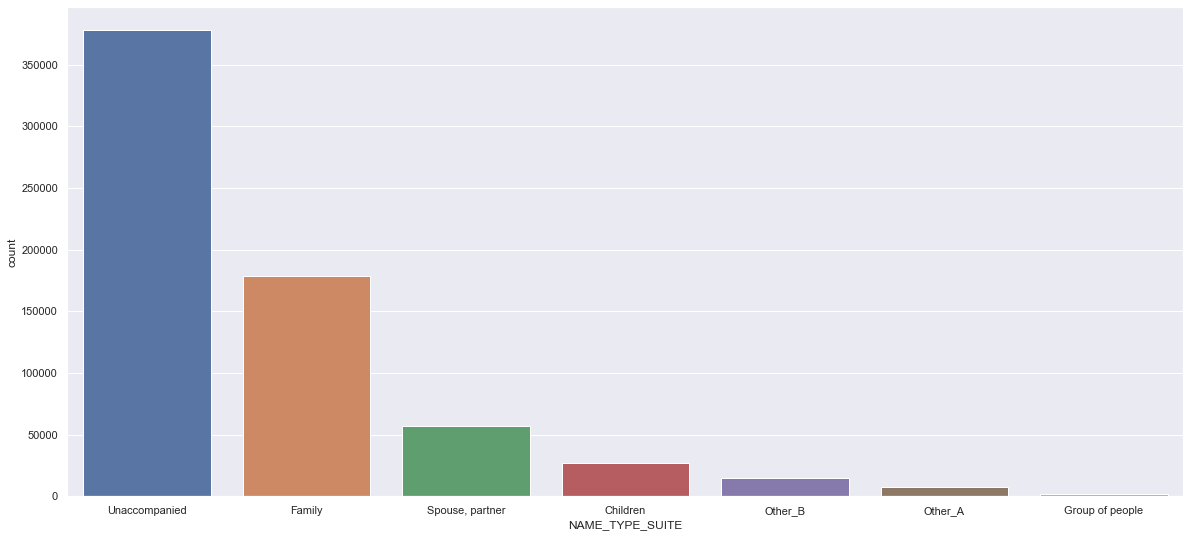


df_Not_Approved:


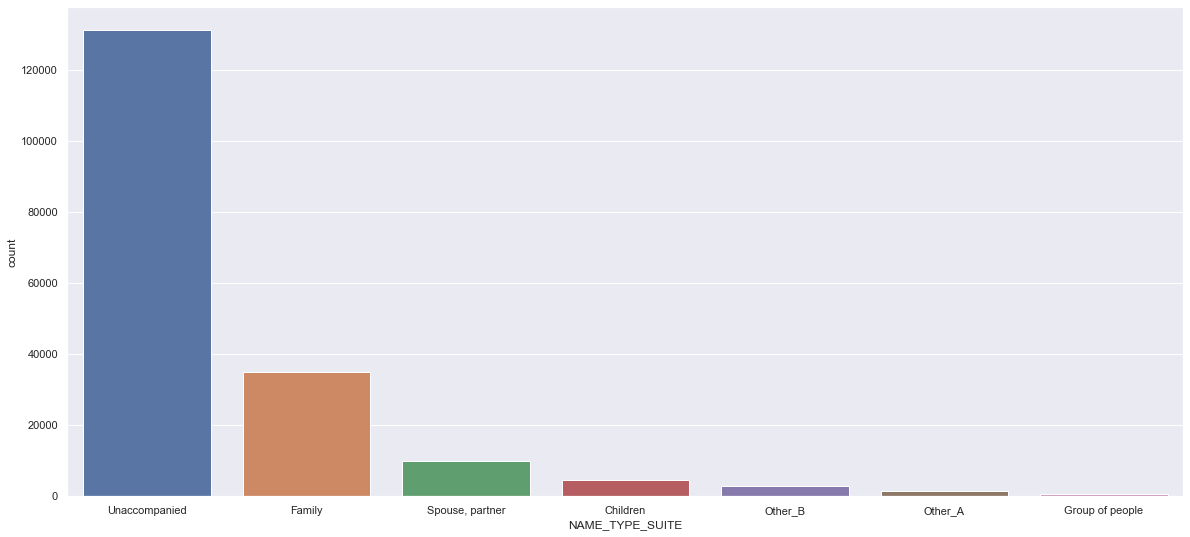

In [81]:
# Performing a univarite analysis to 'NAME_TYPE_SUITE' in both df_Approved and df_Not_Approved dataframe

print('df_Approved: \n')
univariate_analysis(df=df_Approved,col='NAME_TYPE_SUITE',vartype=1)

print('\ndf_Not_Approved:')
univariate_analysis(df=df_Not_Approved,col='NAME_TYPE_SUITE',vartype=1)

<font color='blue'><b>Insights</b>: In Both the Cases its same. That means Type Suits not effect the reason of loan approved.</font> 

#### Grouped interest rate into small, medium and high of the previous application

df_Approved: 



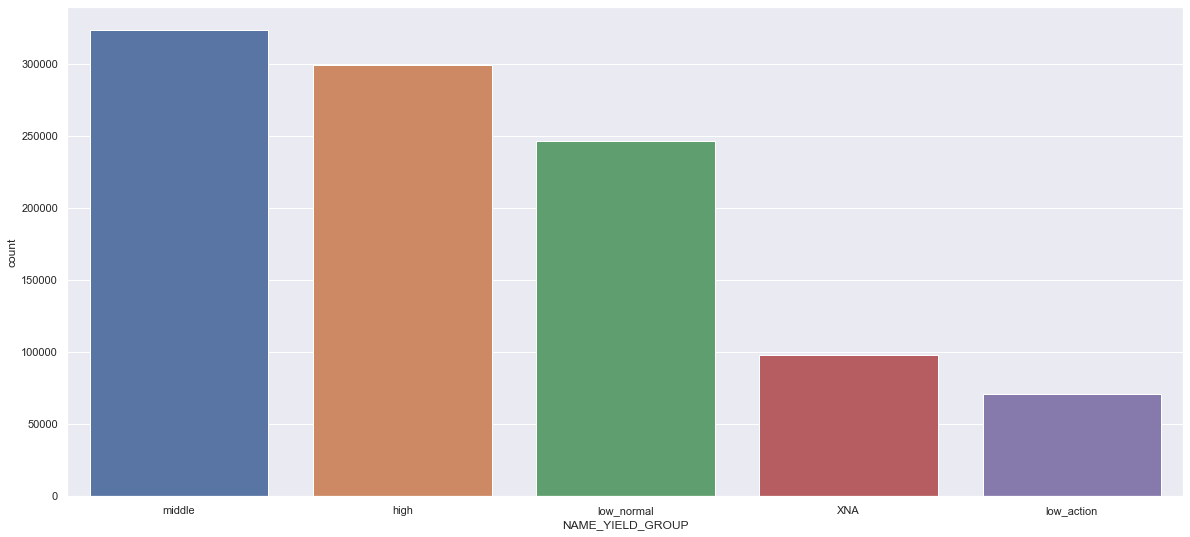


df_Not_Approved:


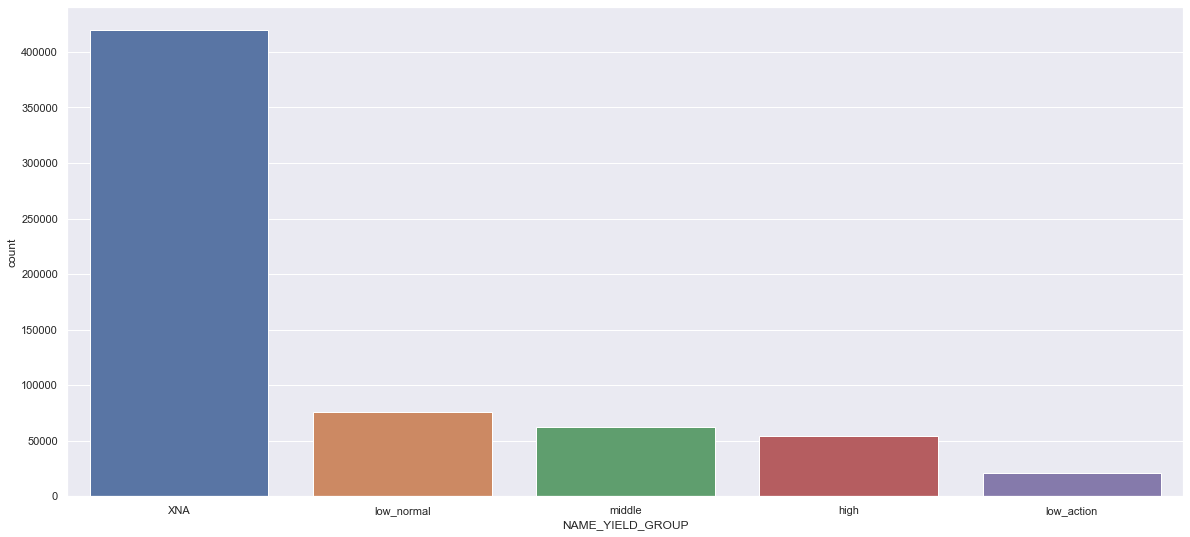

In [82]:
# Performing a univarite analysis to 'NAME_YIELD_GROUP' in both df_Approved and df_Not_Approved dataframe

print('df_Approved: \n')
univariate_analysis(df=df_Approved,col='NAME_YIELD_GROUP',vartype=1)

print('\ndf_Not_Approved:')
univariate_analysis(df=df_Not_Approved,col='NAME_YIELD_GROUP',vartype=1)

<font color='blue'><b>Insights</b>: In Case of Approved : interest rate is in middle Category. In Case of Not-Approved : most frequent interest rate is XNA because loan not approved so intrest rate is Not available but some case intrest rate is low noramal,middle ,high and low_action but loan is not approved because of either bank rejected the loan or clinet cancell the loan.</font> 

### Bivariate Analysis with Continuous and Categorical Variables

We perform Bivariate analysis in the combination of: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

#### Loan and Contract Status

df_Approved:



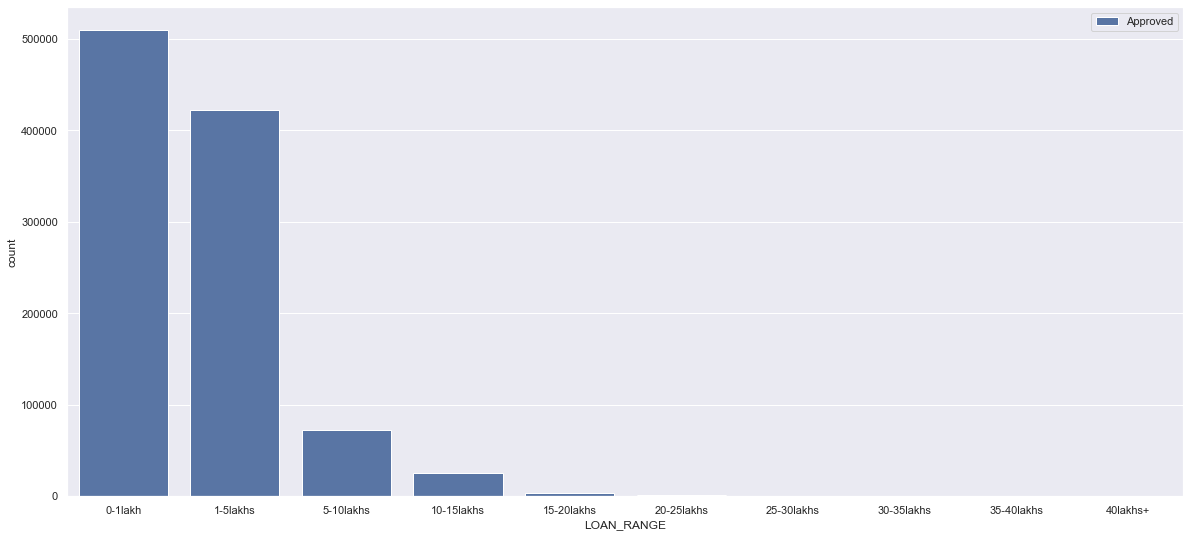


 df_Not_Approved:


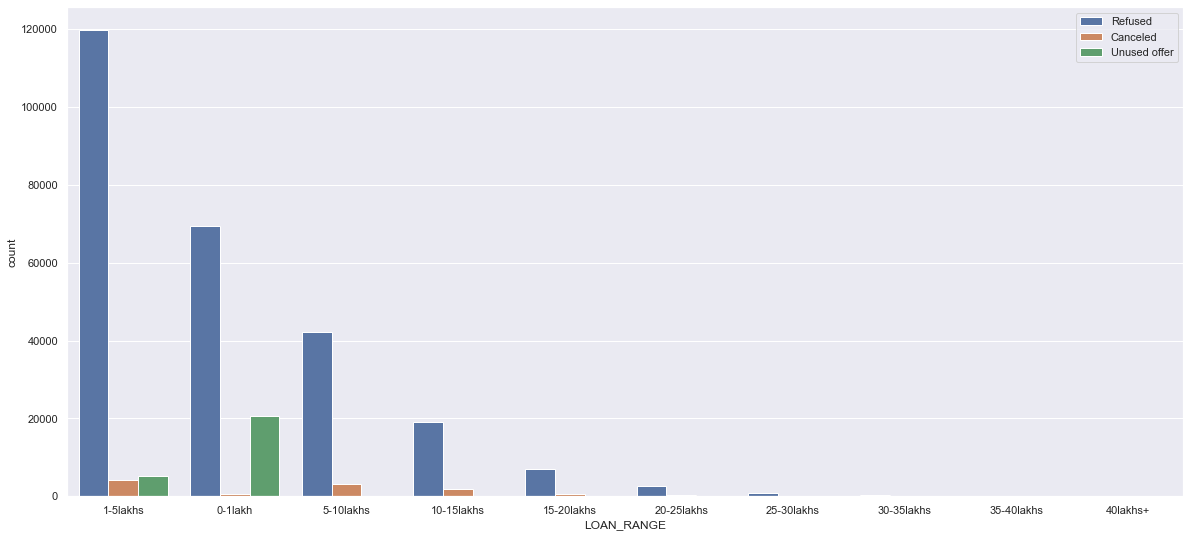

In [83]:
# Performing a Bivariate analysis to 'LOAN_RANGE' and 'NAME_CONTRACT_STATUS' in both the dataframe

print('df_Approved:\n')
univariate_analysis(df=df_Approved,col='LOAN_RANGE',vartype=1,hue='NAME_CONTRACT_STATUS')

print('\n df_Not_Approved:')
univariate_analysis(df=df_Not_Approved,col='LOAN_RANGE',vartype=1,hue='NAME_CONTRACT_STATUS')

<font color='blue'><b>Insights</b>: In Case of Not-Approved : 
    Loan Refused  and unused frequency is higher then canceled.means most of the time bank refused the loan becuse of client not applicable and if applicable then client unused the offer. </font> 

#### Contract Type and Reject Reason


 df_Not_Approved:


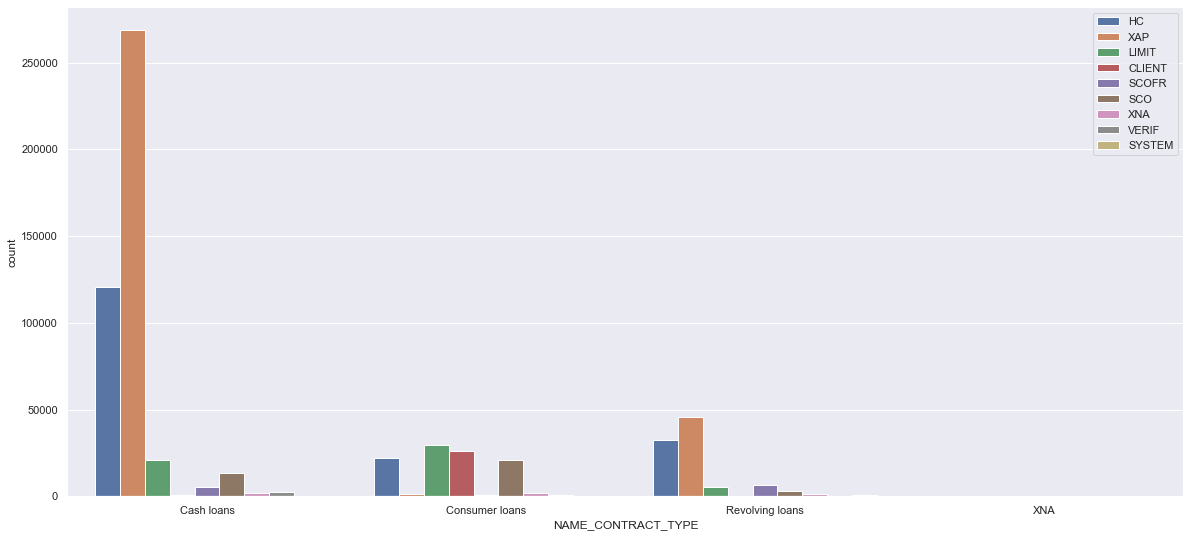

In [86]:
# Performing a Bivariate analysis to 'NAME_CONTRACT_TYPE' and 'CODE_REJECT_REASON' in both the dataframe

print('\n df_Not_Approved:')
univariate_analysis(df=df_Not_Approved,col='NAME_CONTRACT_TYPE',vartype=1,hue='CODE_REJECT_REASON')

<font color='blue'><b>Insights</b>: In Case of Not-Approved : Most of the client applied for Case loan and most of this loan application are rjected because of client not applicable for loan.</font> 

#### Loan and Intrest rate group

df_Approved:



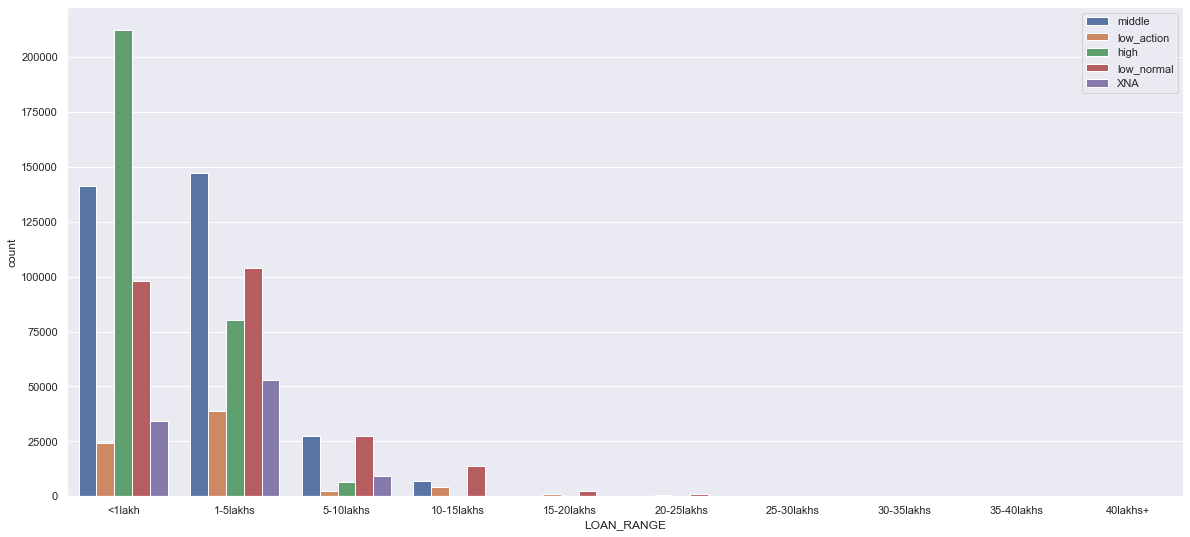


 df_Not_Approved:


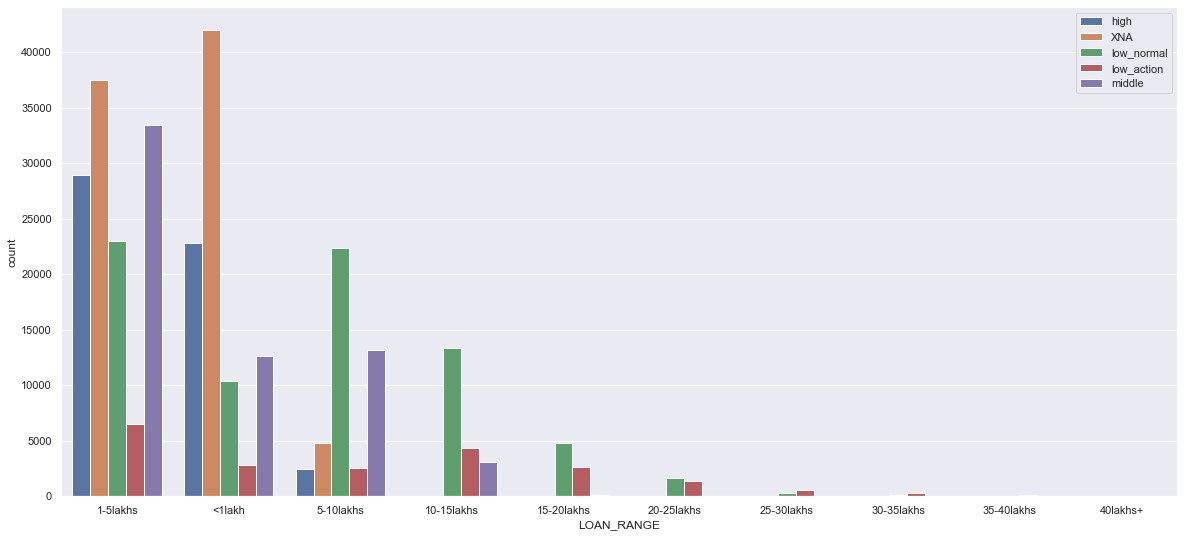

In [106]:
# Performing a Bivariate analysis to 'LOAN_RANGE' and 'NAME_YIELD_GROUP' in both the dataframe

print('df_Approved:\n')
univariate_analysis(df=df_Approved,col='LOAN_RANGE',vartype=1,hue='NAME_YIELD_GROUP')

print('\n df_Not_Approved:')
univariate_analysis(df=df_Not_Approved,col='LOAN_RANGE',vartype=1,hue='NAME_YIELD_GROUP')

<font color='blue'><b>Insights</b>: In case of Approved loan the intrest rate is higher side in the category of less then 1 lakh loan in compared to not approved loan. But in case of not approved loan the intrest rate is mixe of  higher and middle side in less then 1 lakh and 1-5 lakhs category. This means that some loans have been canceled due to high interest rate. </font> 

***
## <font color='blue'><b>Conclusion</b></font> 

### Target Variable
* <font color='blue'><b>`TARGET`(Customer Payment Difficulties) in application data</b></font>
* <font color='blue'><b>`NAME_CONTRACT_STATUS`(Contract status (Approved, Cancelled, Refused and Unused) of previous application) in previous_application data</b></font>


### Top-10 Major variables to consider to set a rule for loan application approval: 

1. <font color='blue'><b>AMT_INCOME_TOTAL</b></font>
2. <font color='blue'><b>AMT_CREDIT</b></font>
3. <font color='blue'><b>INCOME_TYPE</b></font>
4. <font color='blue'><b>EMP_LENGTH</b></font>
5. <font color='blue'><b>NAME_EDUCATION_TYPE</b></font>
6. <font color='blue'><b>NAME_FAMILY_STATUS</b></font>
7. <font color='blue'><b>NAME_HOUSING_TYPE</b></font>
8. <font color='blue'><b>BIRTH_YEARS</b></font>
9. <font color='blue'><b>NAME_CASH_LOAN_PURPOSE</b></font>
10. <font color='blue'><b>NAME_CLIENT_TYPE</b></font>


